In [298]:
import glyco as gl
from matplotlib import pyplot as plt

import matplotlib.image as mpimg

In [299]:
meals_byid.columns

Index(['day', 'hour', 'minute', 'time_fmt', 'time_str', 'ctime', 'cdate',
       'filename', 'dt', 'session_start'],
      dtype='object')

In [300]:
def show_image_by_mealid(mealid, ppath='data/photos_johan/'):
    n = meals_byid.loc[mealid].filename
    print(n)

    if type(n)==pd.Series:
        for i in n:
            gl.start_plot(2,2)
            show_image(i, ppath)
            plt.show()
    else:
        show_image(n, ppath)
        gl.end_plot()
def show_image(ipath, ppath='data/photos_johan/'):
    img = mpimg.imread('{}{}'.format(ppath, ipath))
    imgplot = plt.imshow(img)

In [301]:
okpeaks[-5:].index

Int64Index([4, 3, 19, 15, 30], dtype='int64', name='mid')

Meal: 4


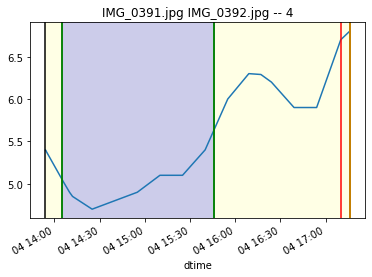

meal_id
4    IMG_0391.jpg
4    IMG_0392.jpg
Name: filename, dtype: object


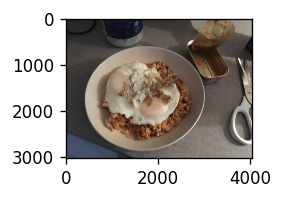

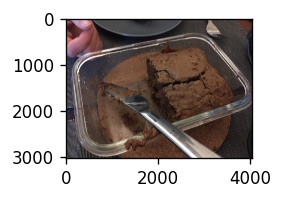

Meal: 3


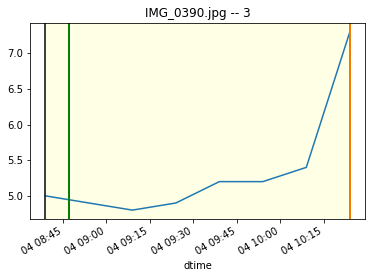

IMG_0390.jpg


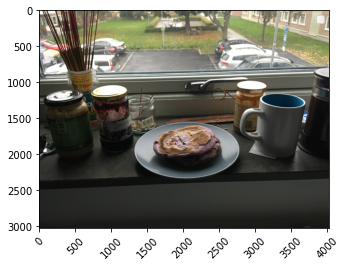

Meal: 19


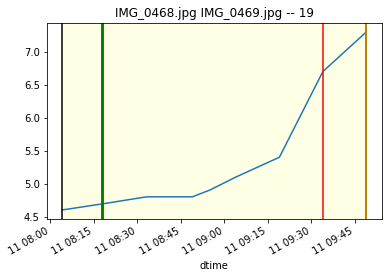

meal_id
19    IMG_0468.jpg
19    IMG_0469.jpg
Name: filename, dtype: object


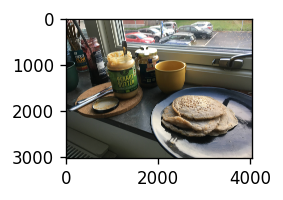

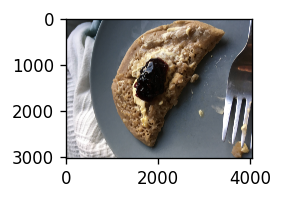

Meal: 15


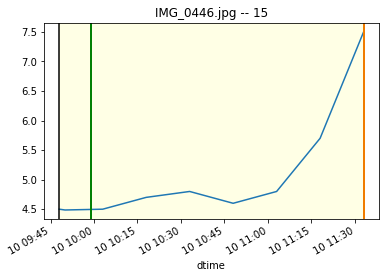

IMG_0446.jpg


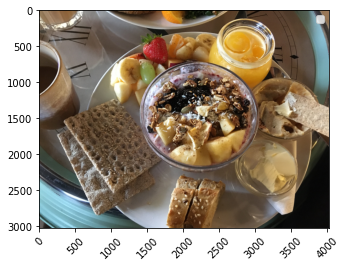

Meal: 30


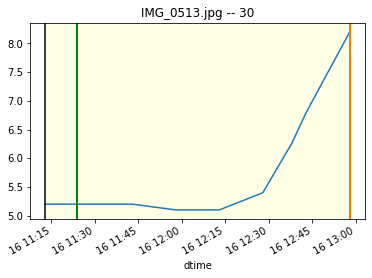

IMG_0513.jpg


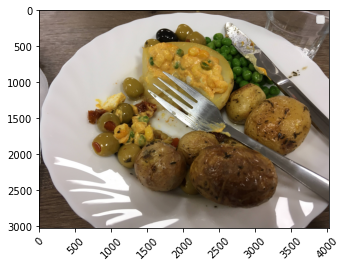

In [302]:
for m in okpeaks[-5:].index:
    print('Meal: {}'.format(m))
    plot_response_to_meal(m)
    show_image_by_mealid(m)

Meal: 13 - Diff : 0.0


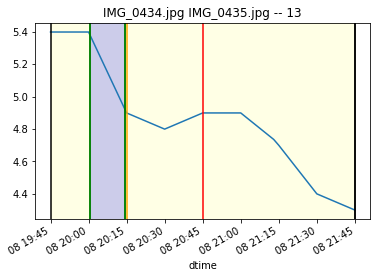

meal_id
13    IMG_0434.jpg
13    IMG_0435.jpg
Name: filename, dtype: object


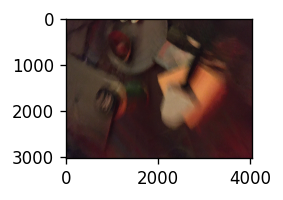

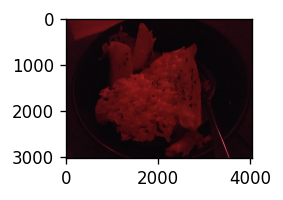

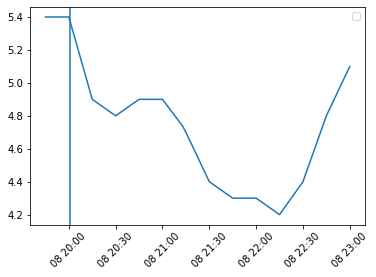

Meal: 28 - Diff : 0.0


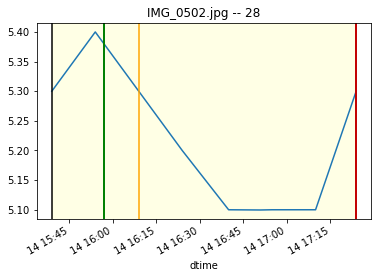

IMG_0502.jpg


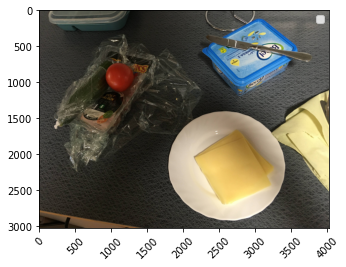

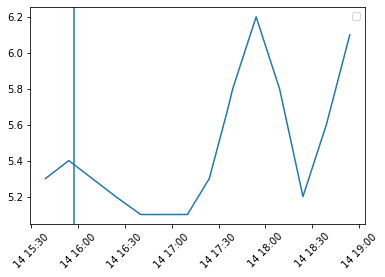

Meal: 5 - Diff : 0.0


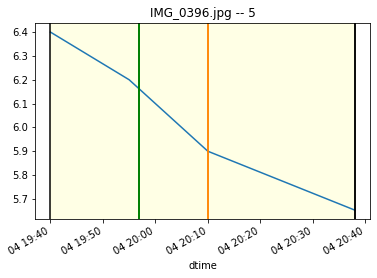

IMG_0396.jpg


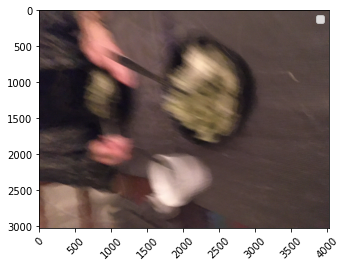

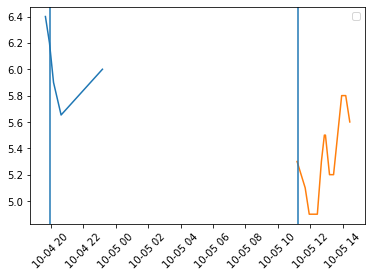

Meal: 32 - Diff : 0.06263651549320048


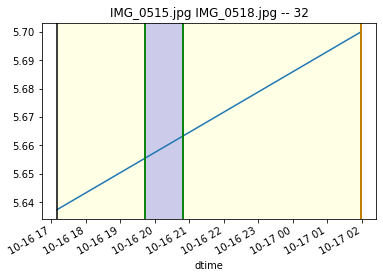

meal_id
32    IMG_0515.jpg
32    IMG_0518.jpg
Name: filename, dtype: object


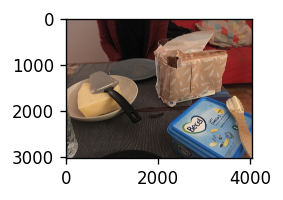

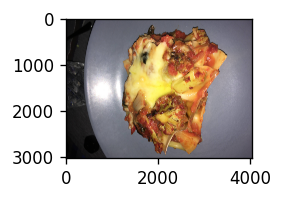

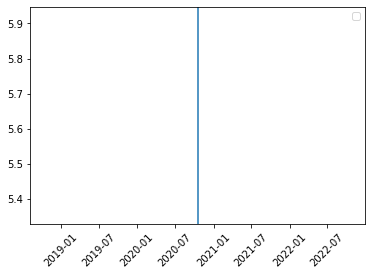

Meal: 6 - Diff : 0.39999999999999947


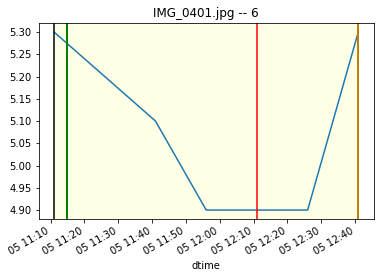

IMG_0401.jpg


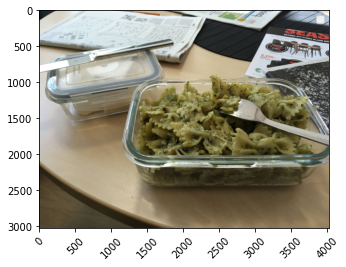

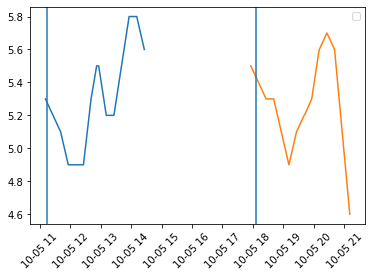

Meal: 25 - Diff : 0.5


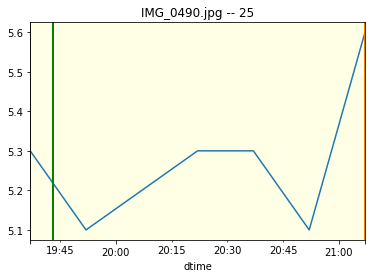

IMG_0490.jpg


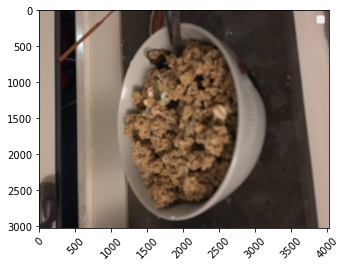

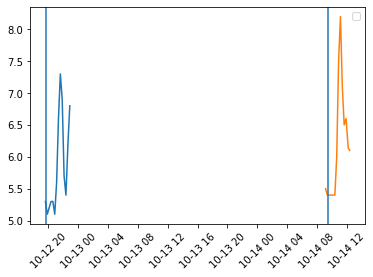

Meal: 31 - Diff : 0.6853880609768757


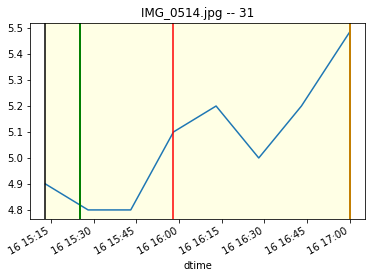

IMG_0514.jpg


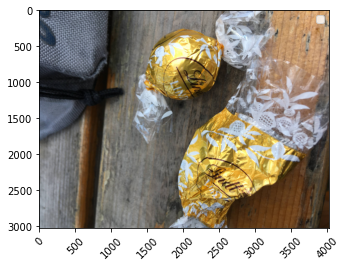

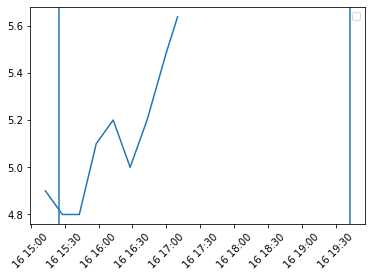

In [327]:
for m in okpeaks[:7].index:
    print('Meal: {} - Diff : {}'.format(m, okpeaks.loc[m]['diff']))
    plot_response_to_meal(m)
    show_image_by_mealid(m)
    
    plot_gl_closeto(m)
    if m+1 in okpeaks.index:
        plot_gl_closeto(m+1)
    gl.end_plot()

In [318]:
def plot_gl_closeto(i, mins=200):
    NN=nearest(df, okpeaks.loc[i].nearest_min + td(minutes=mins))
    plt.plot(df.loc[okpeaks.loc[i].nearest_min:NN][gl.G_LBL])
    plt.axvline(x=okpeaks.loc[i].xmin)

In [337]:
import seaborn as sns

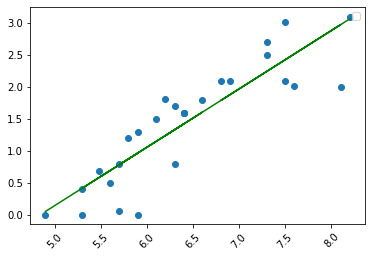

<AxesSubplot:>

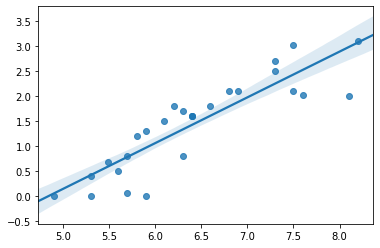

In [345]:

x, y = np.array(okpeaks.peak), np.array(okpeaks['diff'])
m, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, m*x + b, color='green')
gl.end_plot()
sns.regplot(x=x, y=y, ci=80, truncate=False)


In [350]:
okpeaks[okpeaks['diff']>=3]

name  peak         nearest_min                xmin      diff  \
mid                                                                         
15   IMG_0446.jpg   7.5 2020-10-10 09:48:00 2020-10-10 09:59:04  3.013464   
30   IMG_0513.jpg   8.2 2020-10-16 11:13:00 2020-10-16 11:23:46  3.100000   

          cdate    ok  
mid                    
15   2020-10-10  True  
30   2020-10-16  True

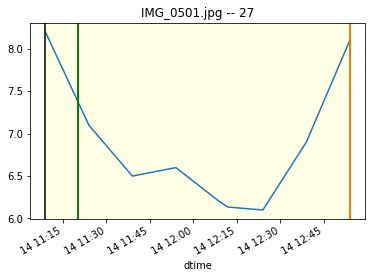

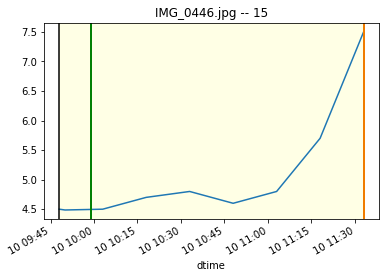

In [352]:
plot_response_to_meal(27)
plot_resp_byname('IMG_0446.jpg')

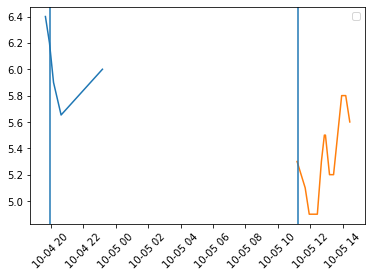

In [323]:
plot_gl_closeto(5)
plot_gl_closeto(6)
gl.end_plot()

In [272]:
from matplotlib import pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as td
import numpy as np
import pandas as pd
S = 1.7*60*60
meals = gl.get_indexed_meals('data/photos_johan/', 'idx', S)
meals_byname = meals.set_index('filename')
meals_byname['file'] = meals_byname.index
meals_byid = meals.set_index('meal_id')

def nearest(df, pivot):
    items = list(df.index)
    n = items.copy()
    for i in range(100):
        m = min(n, key=lambda x: abs(x - pivot))
        q=df.loc[m][gl.G_LBL]
        if type(q)==pd.Series:
            q=q[0]
        if pd.isna(q):
            n.remove(m)
        else:
            return m
        
def nearest_deriv(df, pivot):
    if not 'dg_dt' in df.columns:
        print('Nope')
        return
    items = list(df.index)
    n = items.copy()
    for i in range(100):
        
        m = min(n, key=lambda x: abs(x - pivot))
        if pd.isna(df.loc[m]['dg_dt']):
            n.remove(m)
        else:
            return m

In [273]:
import logging

In [274]:
df = gl.get_glucose_from_file("data/johan_glucose.csv")
mdf = gl.get_glucose_from_file("data/glucose.csv", skiprows=0, interp='slinear')

In [275]:
meals

day  hour  minute  time_fmt time_str               ctime  \
idx                                                                             
2020-10-03 15:50:36    3    15      50      1550    15:50 2020-10-03 15:50:36   
2020-10-03 22:05:18    3    22       5      2205     22:5 2020-10-03 22:05:18   
2020-10-04 08:47:14    4     8      47       847     8:47 2020-10-04 08:47:14   
2020-10-04 14:04:58    4    14       4      1404     14:4 2020-10-04 14:04:58   
2020-10-04 15:45:54    4    15      45      1545    15:45 2020-10-04 15:45:54   
2020-10-04 19:56:54    4    19      56      1956    19:56 2020-10-04 19:56:54   
2020-10-05 11:14:56    5    11      14      1114    11:14 2020-10-05 11:14:56   
2020-10-05 18:06:26    5    18       6      1806     18:6 2020-10-05 18:06:26   
2020-10-05 18:49:58    5    18      49      1849    18:49 2020-10-05 18:49:58   
2020-10-05 20:51:54    5    20      51      2051    20:51 2020-10-05 20:51:54   
2020-10-05 21:19:44    5    21      19      2119    21:19 2020-10-05 21:19:44   
2020-10-05 21:20:10    5    21      20      2120    21:20 2020-10-05 21:20:10   
2020-10-07 19:04:50    7    19       4      1904     19:4 2020-10-07 19:04:50   
2020-10-08 06:57:48    8     6      57       657     6:57 2020-10-08 06:57:48   
2020-10-08 11:52:06    8    11      52      1152    11:52 2020-10-08 11:52:06   
2020-10-08 12:21:54    8    12      21      1221    12:21 2020-10-08 12:21:54   
2020-10-08 15:53:16    8    15      53      1553    15:53 2020-10-08 15:53:16   
2020-10-08 20:00:34    8    20       0      2000     20:0 2020-10-08 20:00:34   
2020-10-08 20:14:22    8    20      14      2014    20:14 2020-10-08 20:14:22   
2020-10-09 14:45:28    9    14      45      1445    14:45 2020-10-09 14:45:28   
2020-10-10 09:59:04   10     9      59       959     9:59 2020-10-10 09:59:04   
2020-10-10 13:15:06   10    13      15      1315    13:15 2020-10-10 13:15:06   
2020-10-10 15:20:52   10    15      20      1520    15:20 2020-10-10 15:20:52   
2020-10-10 20:34:22   10    20      34      2034    20:34 2020-10-10 20:34:22   
2020-10-11 08:17:54   11     8      17       817     8:17 2020-10-11 08:17:54   
2020-10-11 08:18:00   11     8      18       818     8:18 2020-10-11 08:18:00   
2020-10-11 13:34:14   11    13      34      1334    13:34 2020-10-11 13:34:14   
2020-10-11 16:06:00   11    16       6      1606     16:6 2020-10-11 16:06:00   
2020-10-11 19:01:02   11    19       1      1901     19:1 2020-10-11 19:01:02   
2020-10-12 11:14:34   12    11      14      1114    11:14 2020-10-12 11:14:34   
2020-10-12 11:43:30   12    11      43      1143    11:43 2020-10-12 11:43:30   
2020-10-12 15:25:04   12    15      25      1525    15:25 2020-10-12 15:25:04   
2020-10-12 16:22:30   12    16      22      1622    16:22 2020-10-12 16:22:30   
2020-10-12 19:43:28   12    19      43      1943    19:43 2020-10-12 19:43:28   
2020-10-14 09:26:40   14     9      26       926     9:26 2020-10-14 09:26:40   
2020-10-14 11:20:16   14    11      20      1120    11:20 2020-10-14 11:20:16   
2020-10-14 15:57:08   14    15      57      1557    15:57 2020-10-14 15:57:08   
2020-10-15 17:41:20   15    17      41      1741    17:41 2020-10-15 17:41:20   
2020-10-16 11:23:46   16    11      23      1123    11:23 2020-10-16 11:23:46   
2020-10-16 15:25:04   16    15      25      1525    15:25 2020-10-16 15:25:04   
2020-10-16 19:42:26   16    19      42      1942    19:42 2020-10-16 19:42:26   
2020-10-16 20:49:56   16    20      49      2049    20:49 2020-10-16 20:49:56   

                          cdate      filename        dt  session_start  \
idx                                                                      
2020-10-03 15:50:36  2020-10-03  IMG_0387.jpg       NaN           True   
2020-10-03 22:05:18  2020-10-03  IMG_0389.jpg   22482.0           True   
2020-10-04 08:47:14  2020-10-04  IMG_0390.jpg   38516.0           True   
2020-10-04 14:04:58  2020-10-04  IMG_0391.jpg   19064.0           True   
2020-10-04 1

In [115]:
meal['dt']

NameError: name 'meal' is not defined

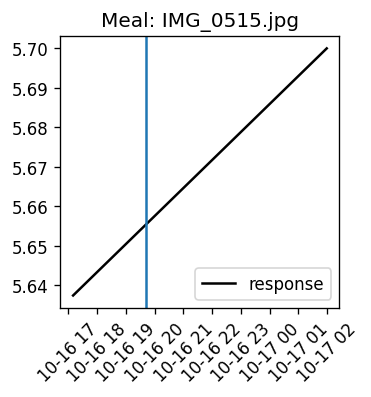

In [116]:
M = 'IMG_0515.jpg'
meal = meals_byname.loc[M]

xmin= meal.ctime-td(minutes=30)
nmin = nearest(df, xmin)
xmax= meal.ctime+td(minutes=200)
nmax = nearest(df, xmax)
gl.start_plot(3,3)

plt.plot(df.loc[nmin:nmax][gl.G_LBL], label='response', color='black')
plt.title('Meal: {}'.format(M))
plt.axvline(x=meal.ctime)
gl.end_plot()

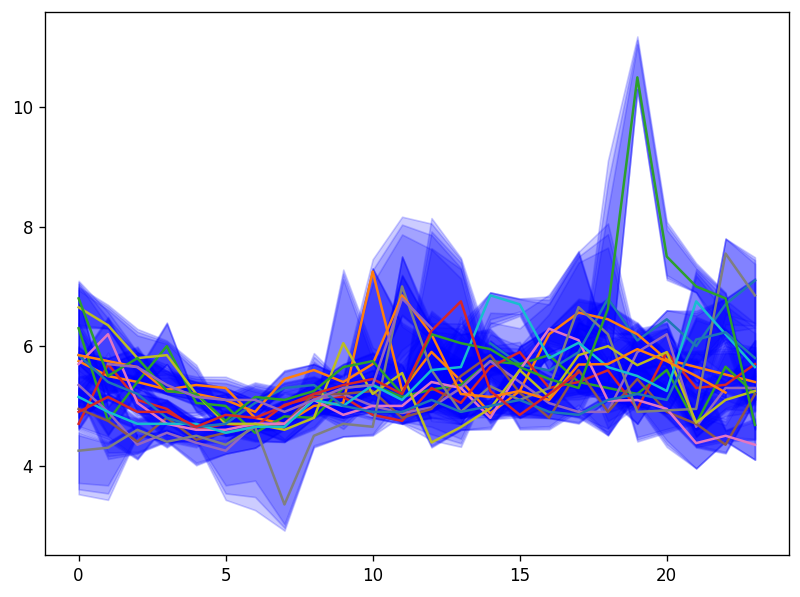

In [117]:
das = df._date.unique()
gl.start_plot()
for i in range(len(das)):
    dg=das[i]
    gl.plot_percentiles(df.loc[dg.strftime('%Y-%m-%d')], dist=[0.01, 0.05, 0.1], whole=False)
    #plt.show()

In [118]:
!pip install altair

You should consider upgrading via the '/Users/ismail/precision/repos/glyco/venv/bin/python3.8 -m pip install --upgrade pip' command.


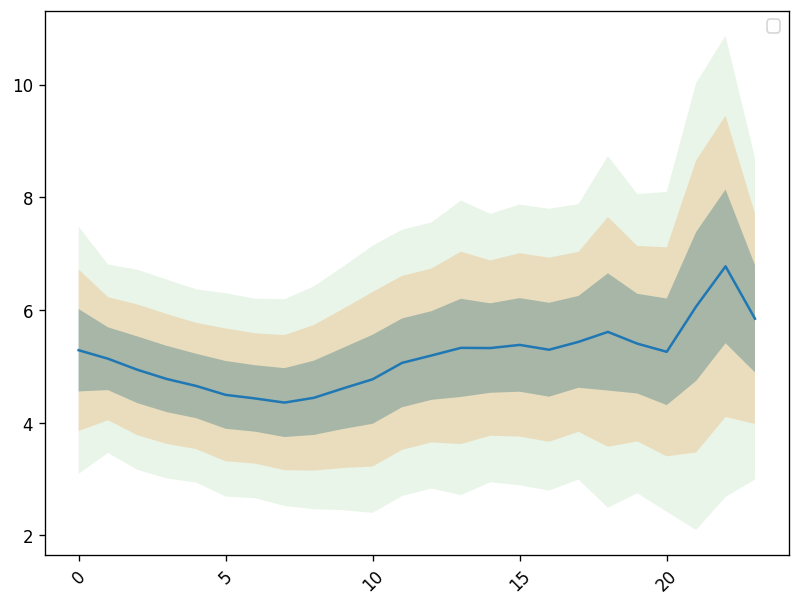

In [119]:
gl.plot_glucose_perc(mdf)

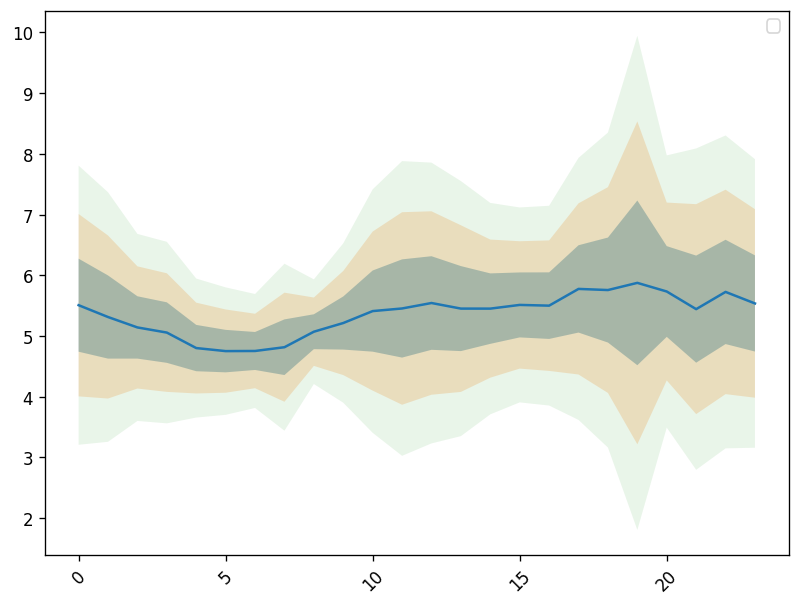

In [120]:
gl.plot_glucose_perc(df)

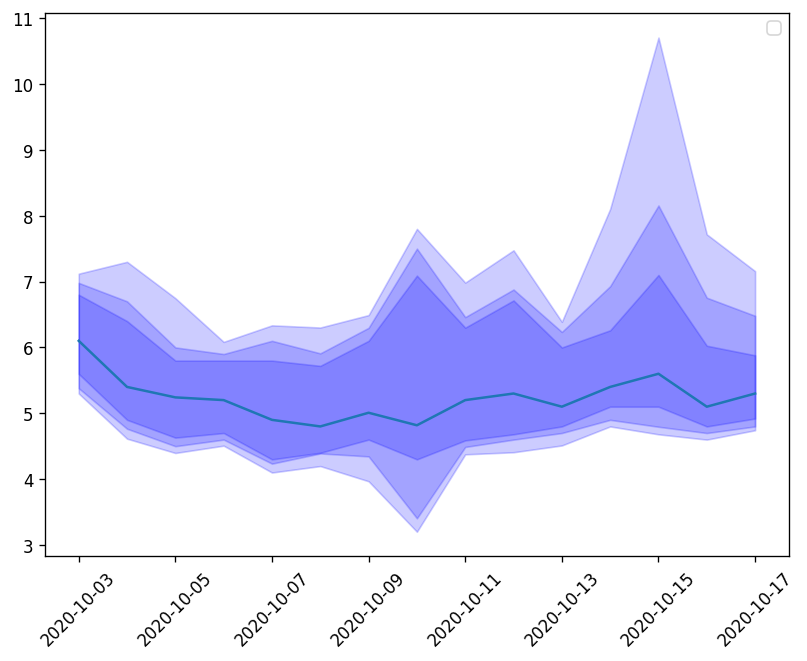

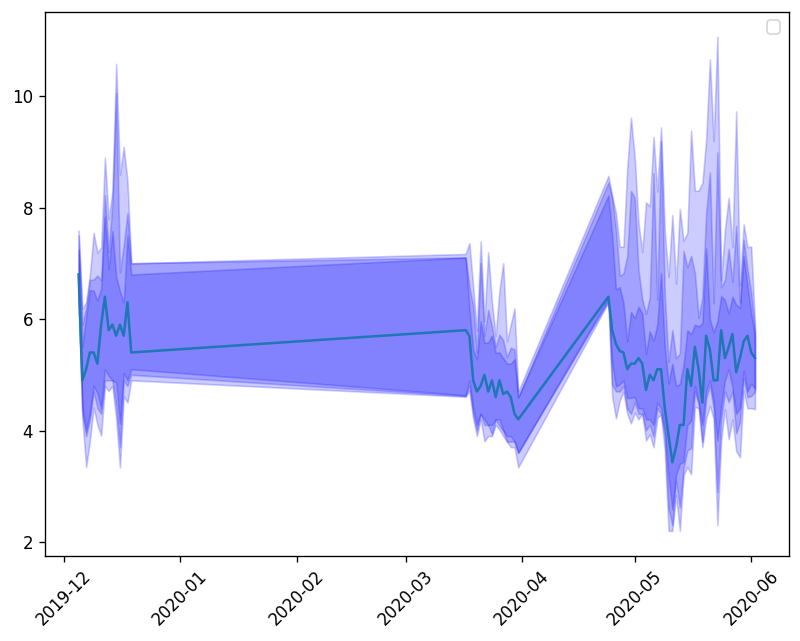

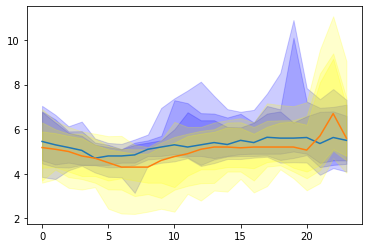

In [121]:
gl.plot_percentiles(df, glbl=gl.G_LBL, group_lbl=gl.DAT_LBL, dist=[0.01, 0.05,0.1])
gl.plot_percentiles(mdf, glbl=gl.G_LBL, group_lbl=gl.DAT_LBL, dist=[0.01, 0.05,0.1])

gl.plot_percentiles(df, glbl=gl.G_LBL, dist=[0.01, 0.05,0.1], whole=False)
gl.plot_percentiles(mdf.loc['2020'], glbl=gl.G_LBL, dist=[0.01, 0.05,0.1], whole=False, clr='yellow')

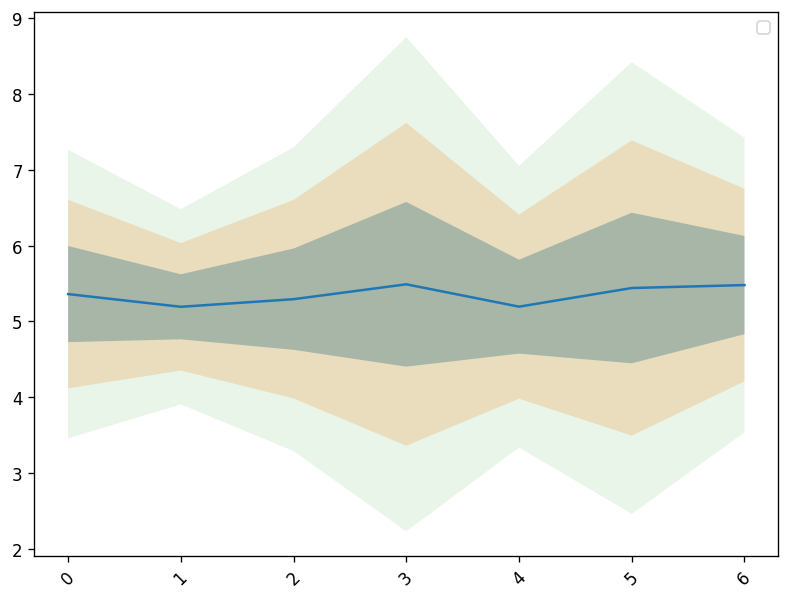

In [7]:
gl.plot_glucose_perc(df, glbl=gl.G_LBL, group_lbl='dayofweek')

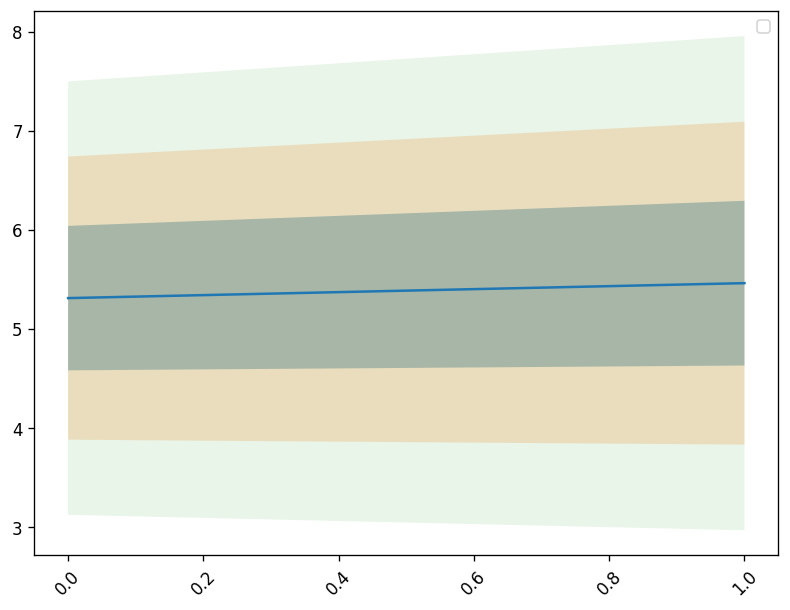

In [8]:
gl.plot_glucose_perc(df, glbl=gl.G_LBL, group_lbl='weekend')

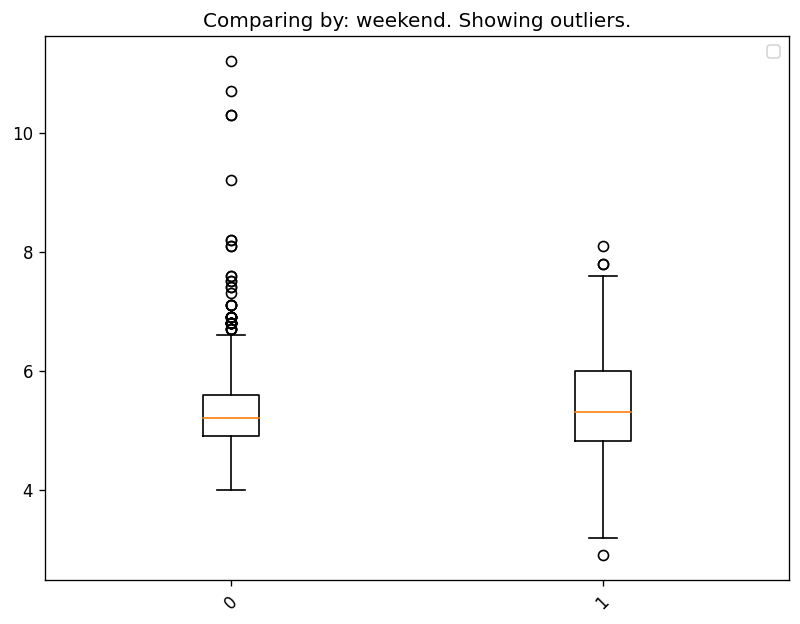

In [9]:
gl.plot_box_compare(df, outliers=True)

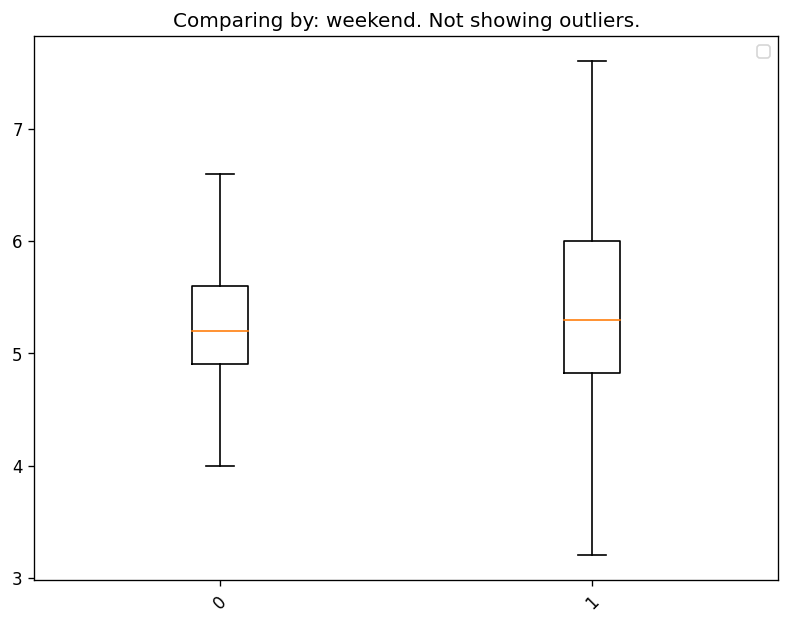

In [10]:
gl.plot_box_compare(df)

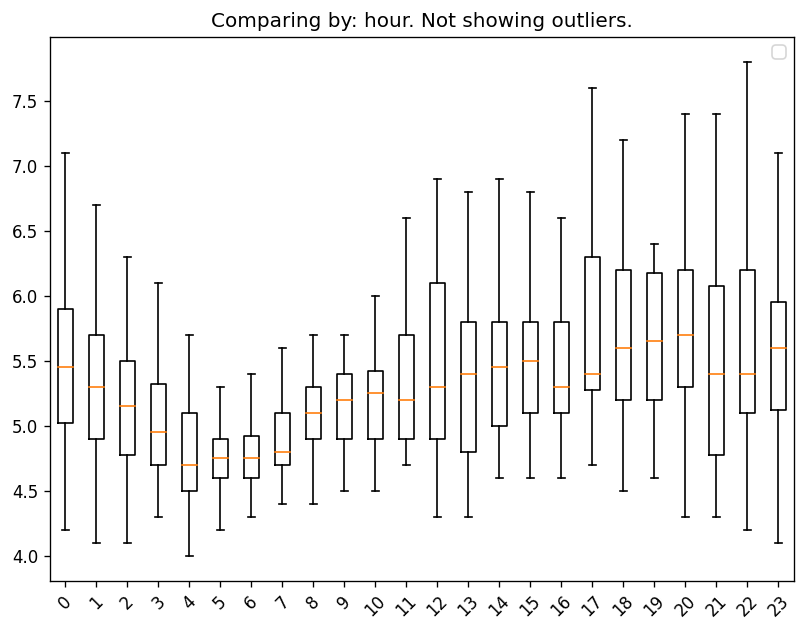

In [11]:
gl.plot_box_compare(df, compare_by='hour')

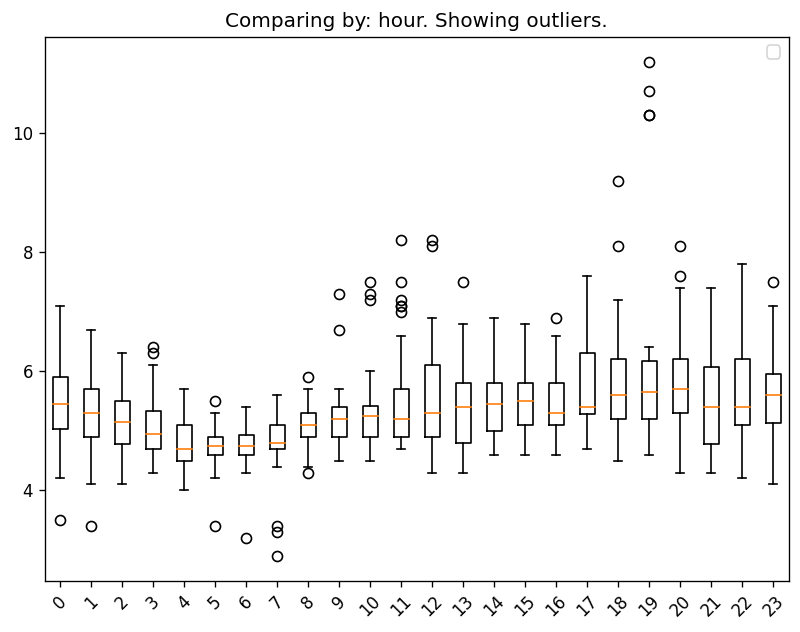

In [12]:
gl.plot_box_compare(df, compare_by='hour', outliers=True)

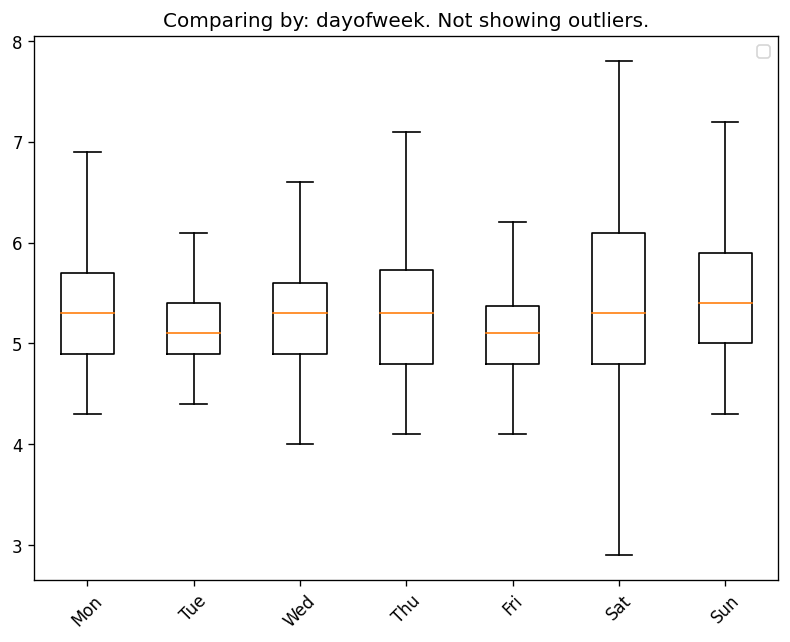

In [13]:
weekday_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
fn = lambda x: [weekday_map[i] for i in x]
gl.plot_box_compare(df, compare_by='dayofweek', label_map=fn)

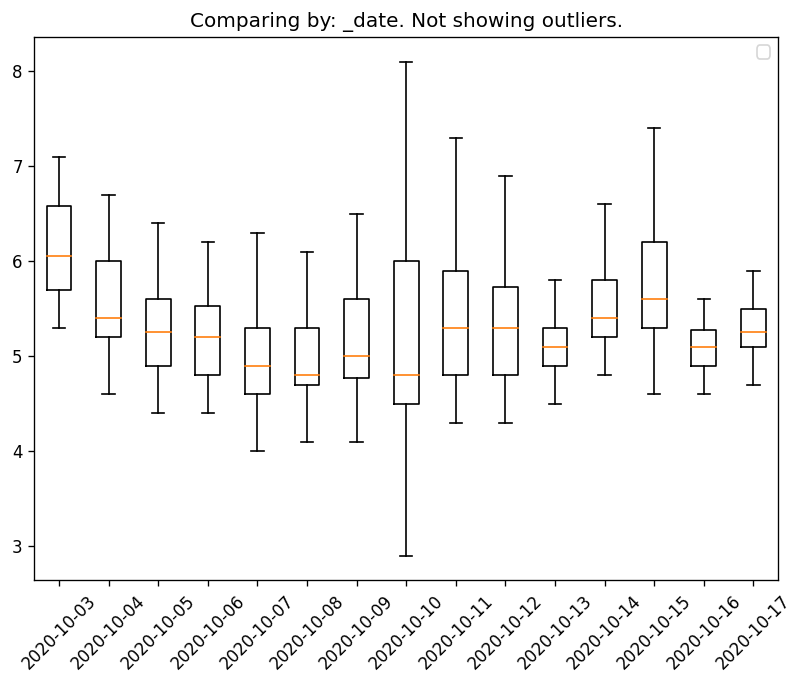

In [14]:
gl.plot_box_compare(df, compare_by='_date')

In [15]:
first_week = df.loc[:'2020-10-9']
second_week = df.loc['2020-10-10':]

# Meals

In [27]:
df

Device  \
dtime                                      
2020-10-03 13:36:00  FreeStyle LibreLink   
2020-10-03 14:38:00  FreeStyle LibreLink   
2020-10-03 14:40:00  FreeStyle LibreLink   
2020-10-03 14:40:00  FreeStyle LibreLink   
2020-10-03 14:40:00  FreeStyle LibreLink   
...                                  ...   
2020-10-17 11:59:00  FreeStyle LibreLink   
2020-10-17 12:14:00  FreeStyle LibreLink   
2020-10-17 12:16:00  FreeStyle LibreLink   
2020-10-17 12:39:00  FreeStyle LibreLink   
2020-10-17 12:43:00  FreeStyle LibreLink   

                                            Serial Number  Device Timestamp  \
dtime                                                                         
2020-10-03 13:36:00  b657a541-5134-401b-bd5d-2b48bf6dd42e  03-10-2020 13:36   
2020-10-03 14:38:00  b657a541-5134-401b-bd5d-2b48bf6dd42e  03-10-2020 14:38   
2020-10-03 14:40:00  b657a541-5134-401b-bd5d-2b48bf6dd42e  03-10-2020 14:40   
2020-10-03 14:40:00  b657a541-5134-401b-bd5d-2b48bf6dd42e  03-10-2020 14:40   
2020-10-03 14:40:00  b657a541-5134-401b-bd5d-2b48bf6dd42e  03-10-2020 14:40   
...                                                   ...               ...   
2020-10-17 11:59:00  b657a541-5134-401b-bd5d-2b48bf6dd42e  17-10-2020 11:59   
2020-10-17 12:14:00  b657a541-5134-401b-bd5d-2b48bf6dd42e  17-10-2020 12:14   
2020-10-17 12:16:00  b657a541-5134-401b-bd5d-2b48bf6dd42e  17-10-2020 12:16   
2020-10-17 12:39:00  b657a541-5134-401b-bd5d-2b48bf6dd42e  17-10-2020 12:39   
2020-10-17 12:43:00  b657a541-5134-401b-bd5d-2b48bf6dd42e  17-10-2020 12:43   

                     Record Type  Historic Glucose mmol/L  \
dtime                                                       
2020-10-03 13:36:00            6                      NaN   
2020-10-03 14:38:00            0                      6.1   
2020-10-03 14:40:00            6                      NaN   
2020-10-03 14:40:00            1                      NaN   
2020-10-03 14:40:00            1                      NaN   
...                          ...                      ...   
2020-10-17 11:59:00            0                      7.1   
2020-10-17 12:14:00            0                      6.3   
2020-10-17 12:16:00            1                      NaN   
2020-10-17 12:39:00            1                      NaN   
2020-10-17 12:43:00            1                      NaN   

                     Scan Glucose mmol/L  Non-numeric Rapid-Acting Insulin  \
dtime                                                                        
2020-10-03 13:36:00                  NaN                               NaN   
2020-10-03 14:38:00                  NaN                               NaN   
2020-10-03 14:40:00                  NaN                               NaN   
2020-10-03 14:40:00                  5.8                               NaN   
2020-10-03 14:40:00                  5.8                               NaN   
...                                  ...                               ...   
2020-10-17 11:59:00                  NaN                               NaN   
2020-10-17 12:14:00                  NaN                               NaN   
2020-10-17 12:16:00                  5.7                               NaN   
2020-10-17 12:39:00                  7.1                               NaN   
2020-10-17 12:43:00                  6.8                               NaN   

                     Rapid-Acting Insulin (units)  Non-numeric Food  \
dtime                                                                 
2020-10-03 13:36:00                           NaN               NaN   
2020-10-03 14:38:00                           NaN               NaN   
2020-10-03 14:40:00                           NaN               NaN   
2020-10-03 14:40:00                           NaN               NaN   
2020-10-03 14:40:00                           NaN               NaN   
...                                           ...               ...   
2020-10-17 11:59:00                           NaN       

In [31]:
nearest(df, xmin)

Timestamp('2020-10-05 20:56:00')

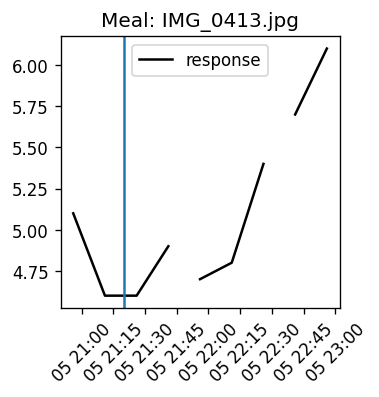

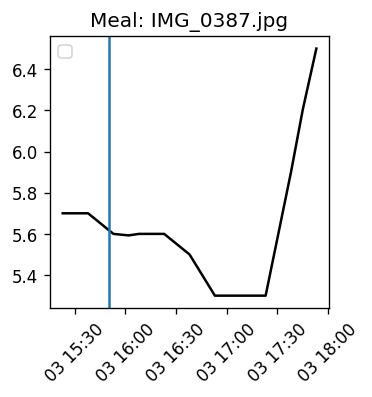

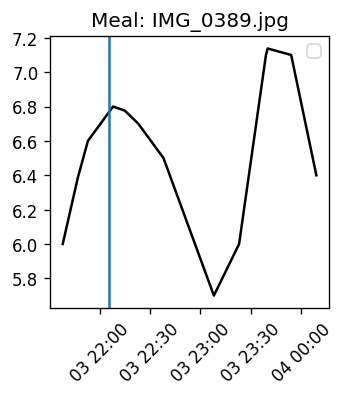

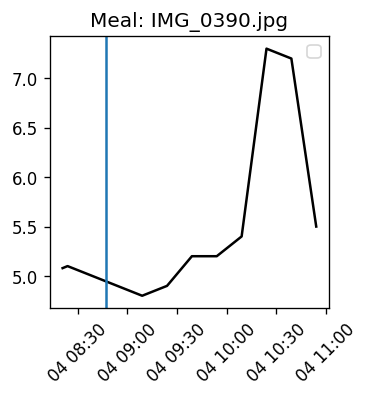

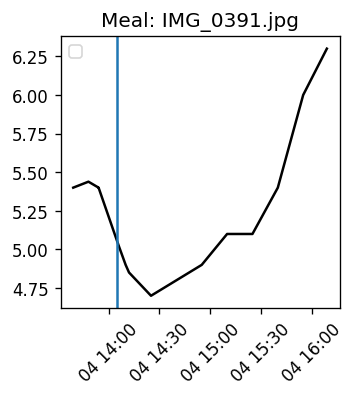

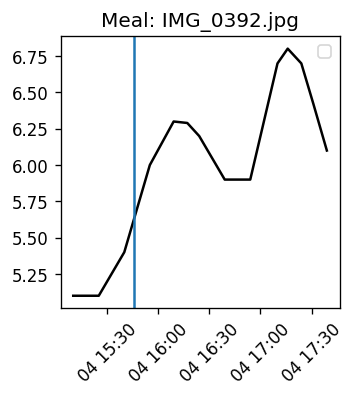

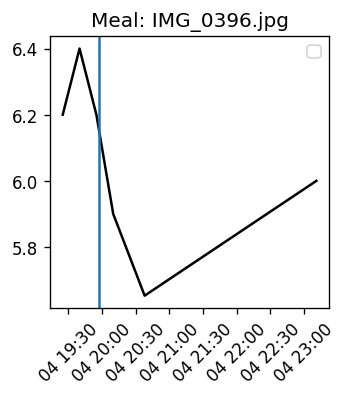

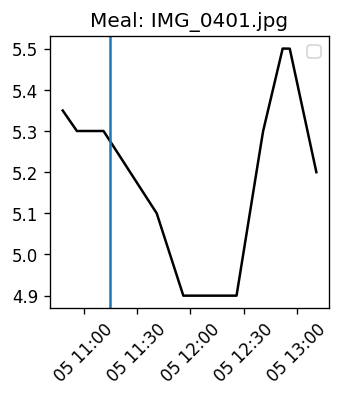

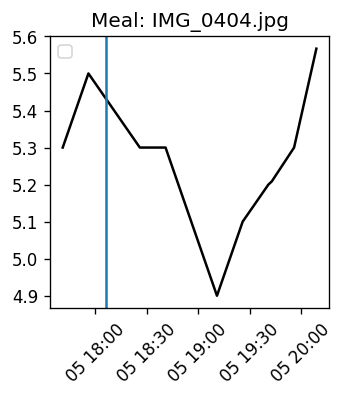

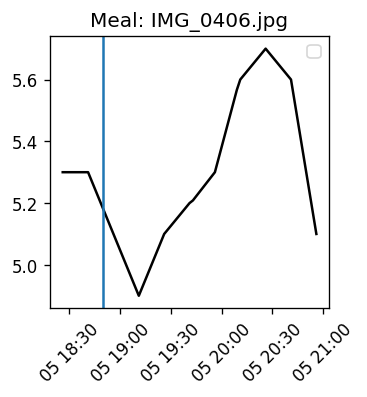

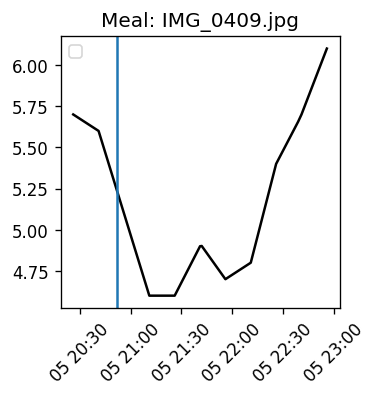

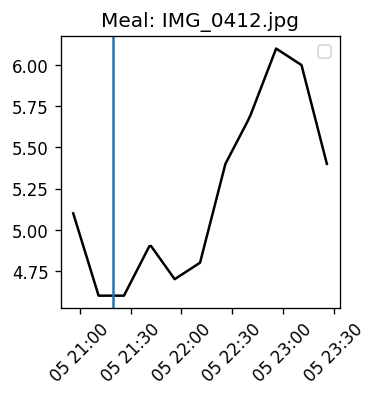

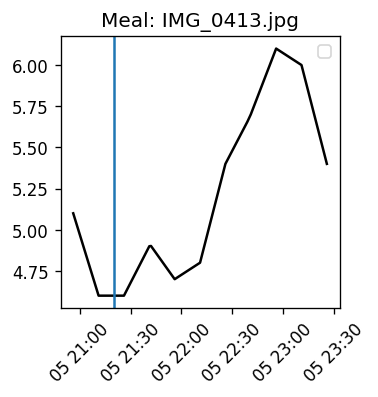

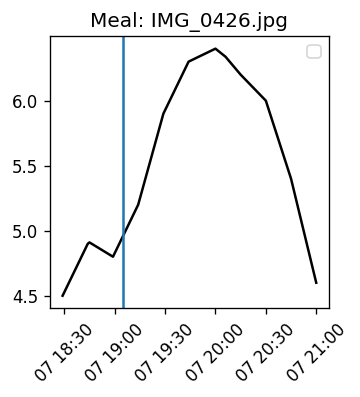

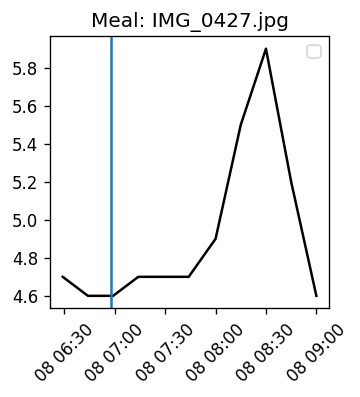

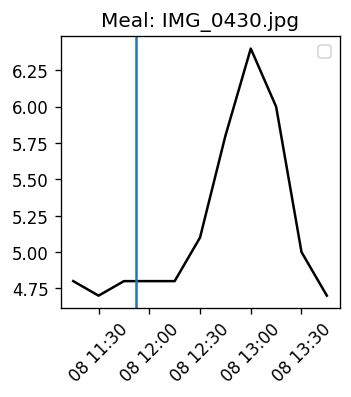

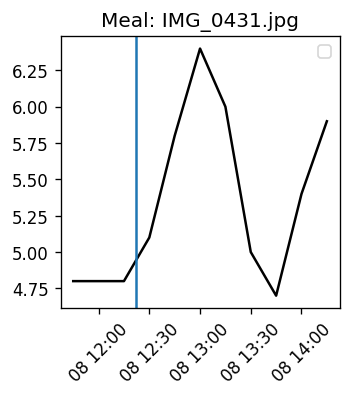

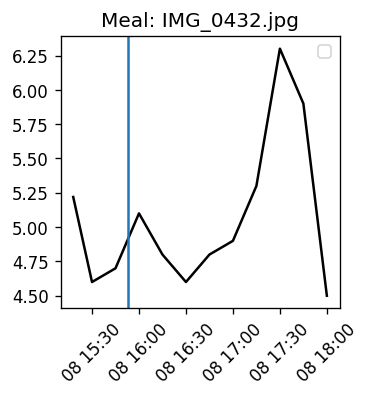

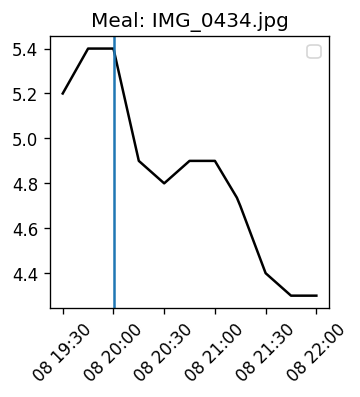

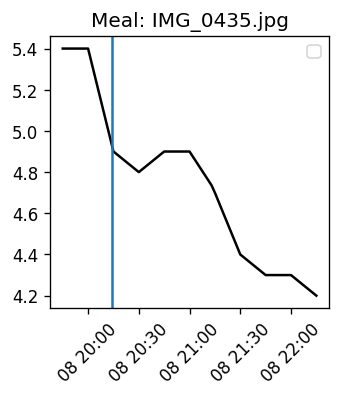

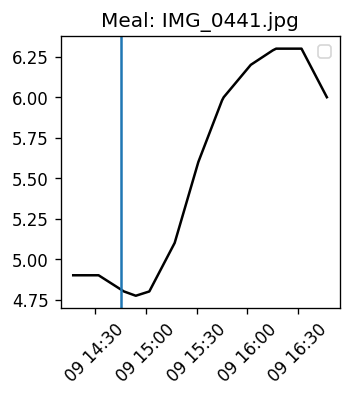

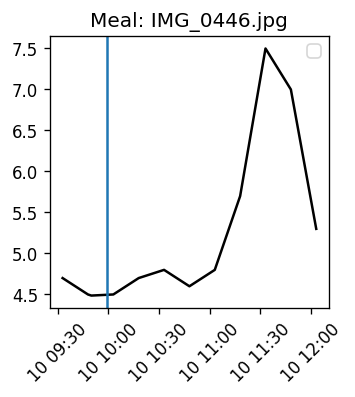

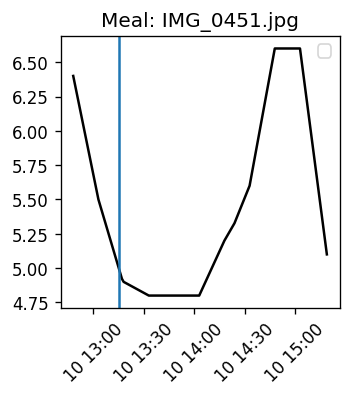

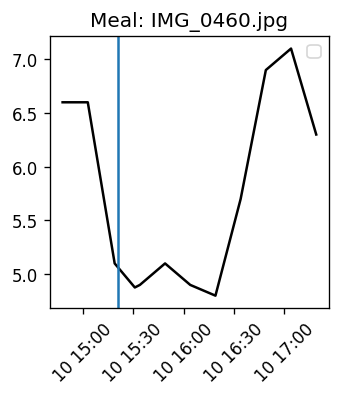

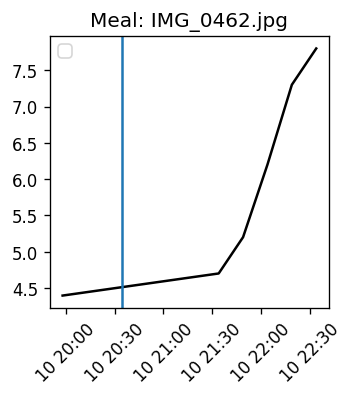

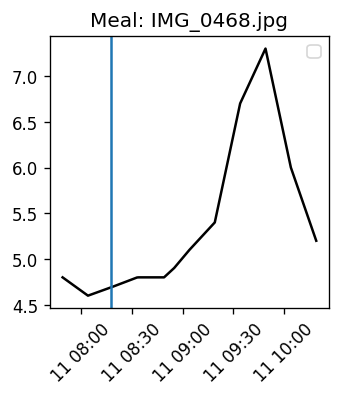

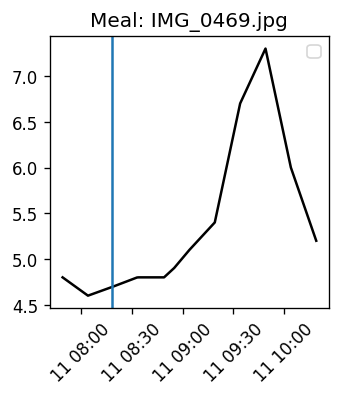

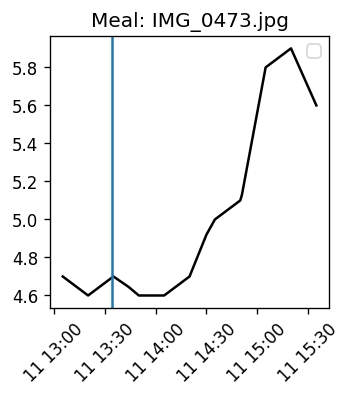

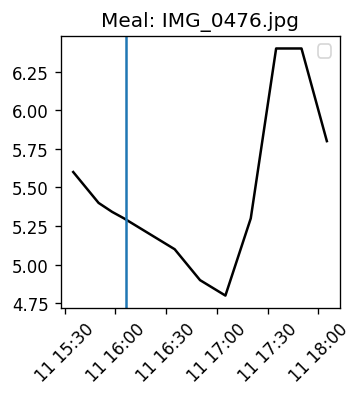

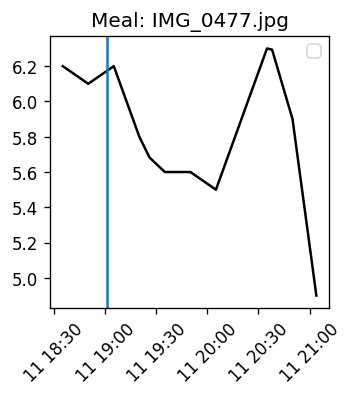

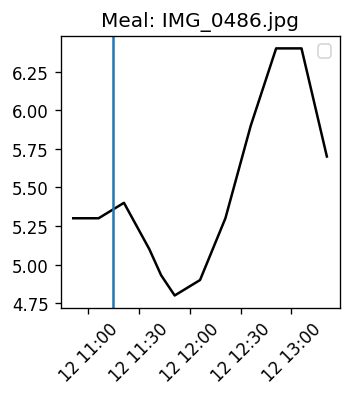

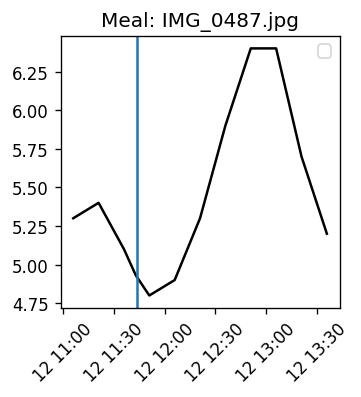

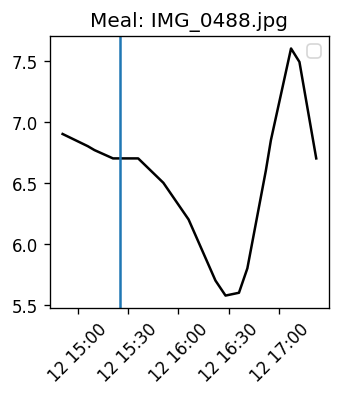

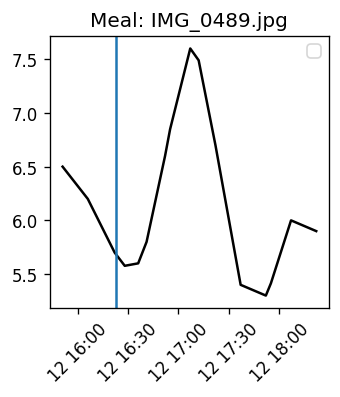

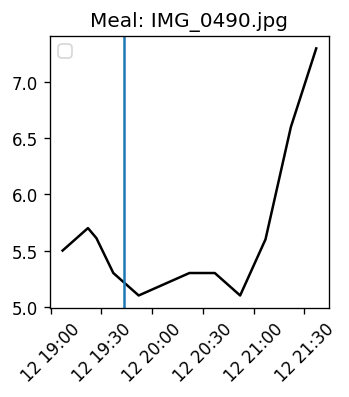

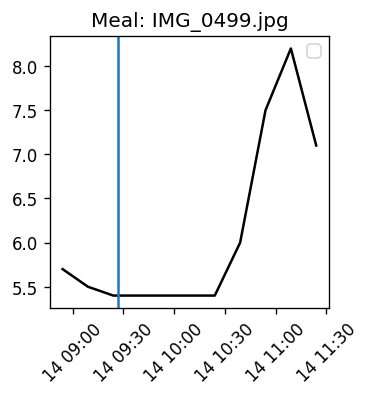

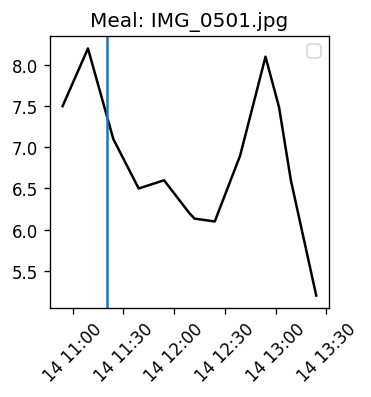

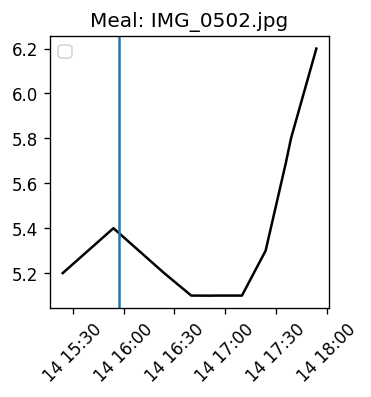

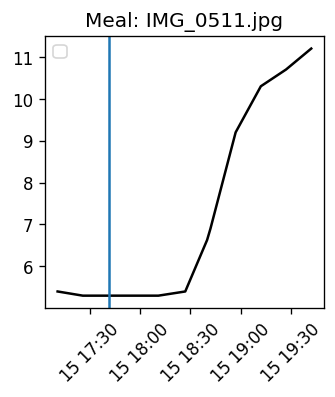

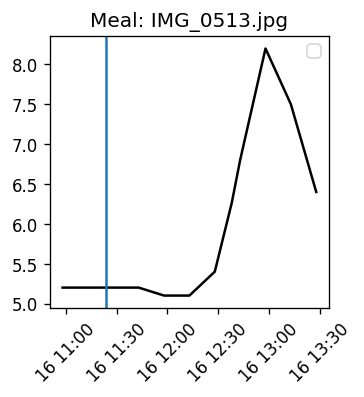

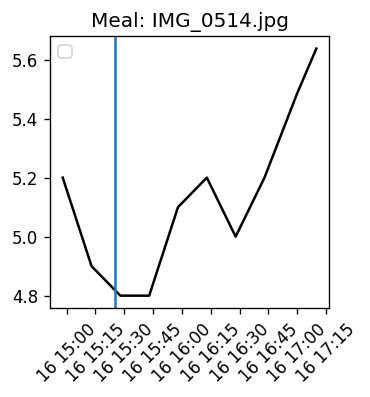

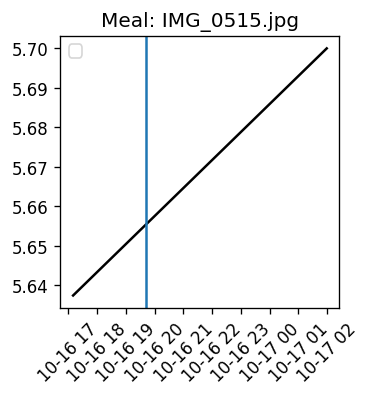

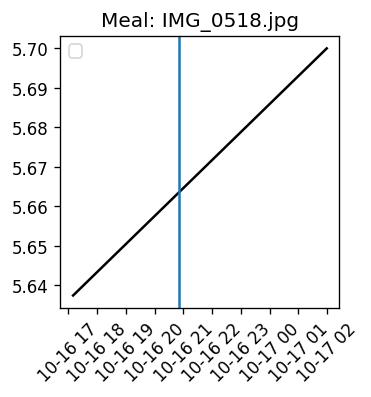

In [122]:
for M in meals.filename:
    meal = meals_byname.loc[M]

    xmin= meal.ctime-td(minutes=30)
    nmin = nearest(df, xmin)
    xmax= meal.ctime+td(minutes=120)
    nmax = nearest(df, xmax)
    gl.start_plot(3,3)

    plt.plot(df.loc[nmin:nmax][gl.G_LBL], color='black')
    plt.title('Meal: {}'.format(M))
    plt.axvline(x=meal.ctime)
    gl.end_plot()

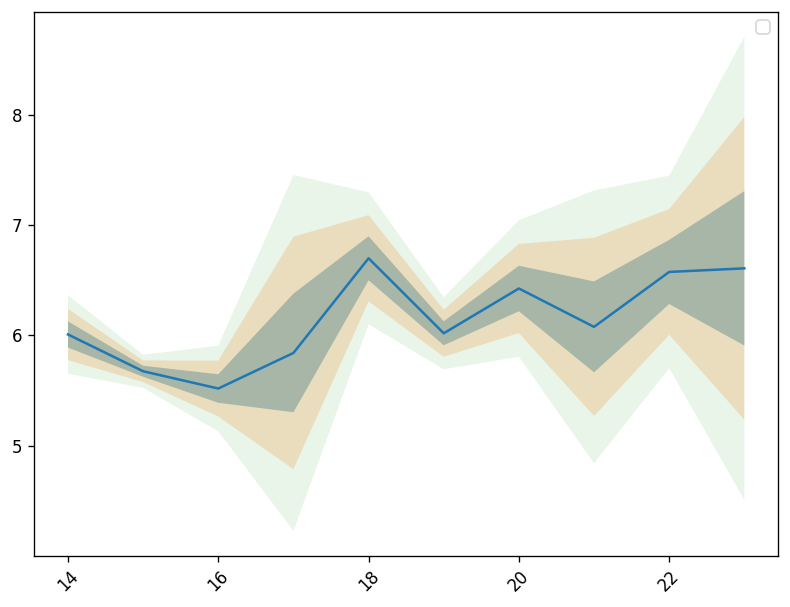

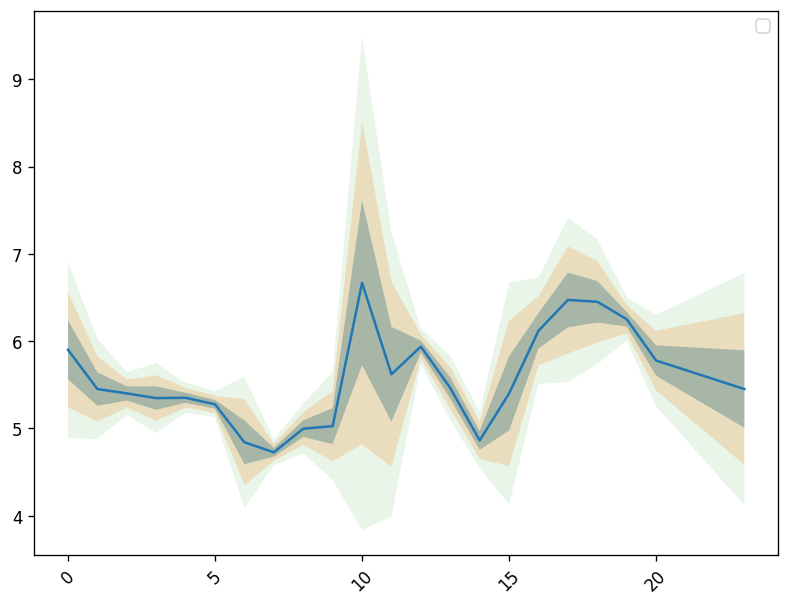

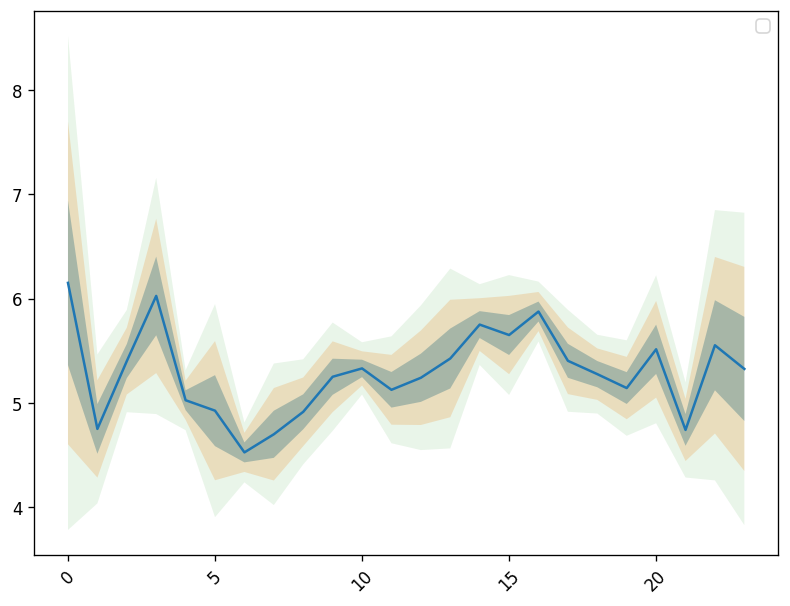

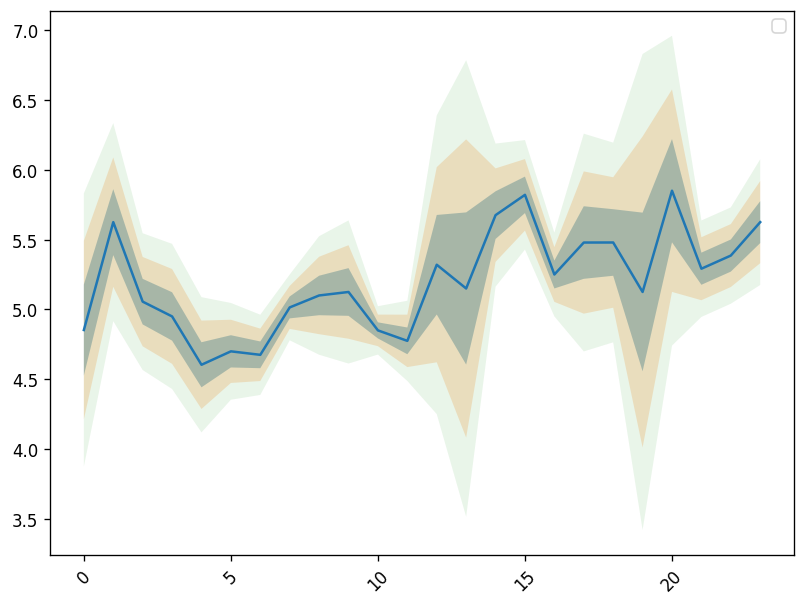

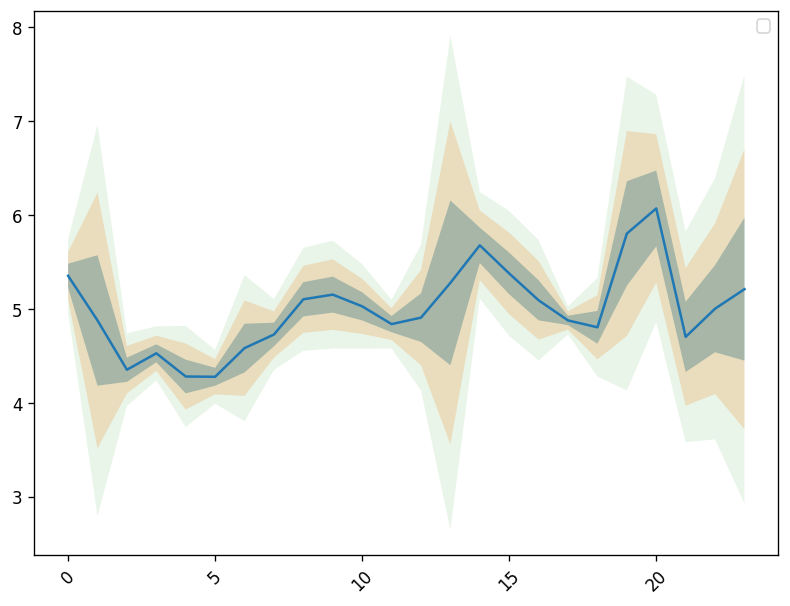

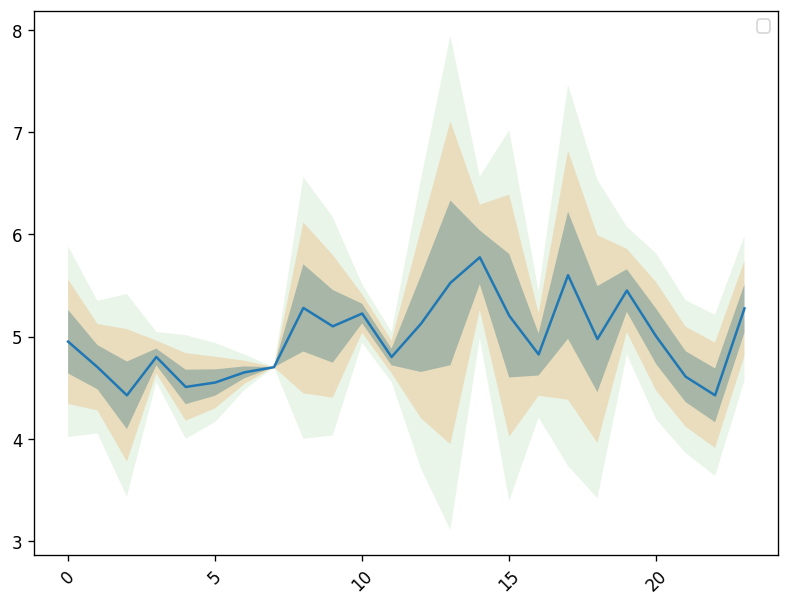

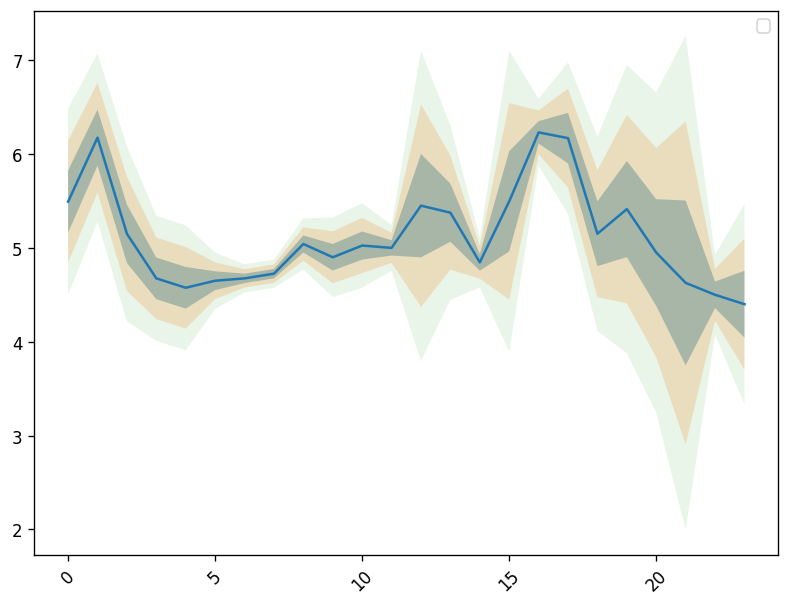

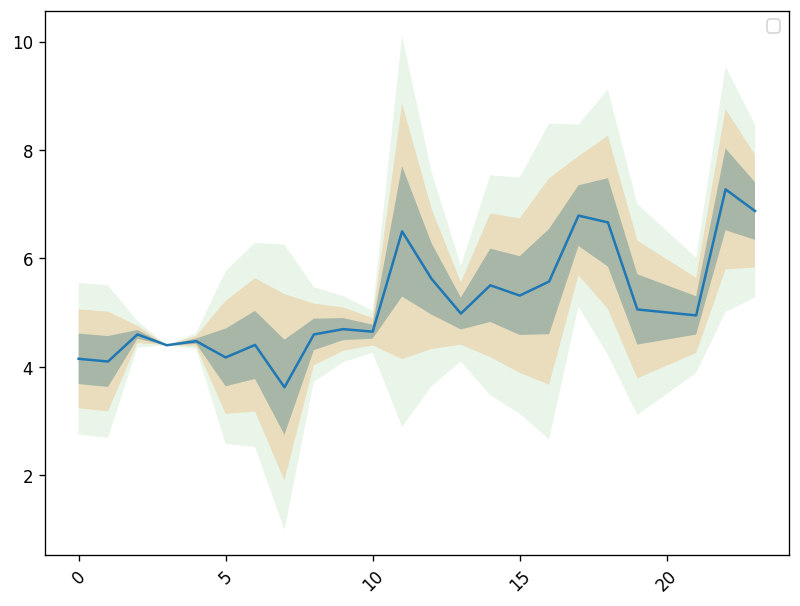

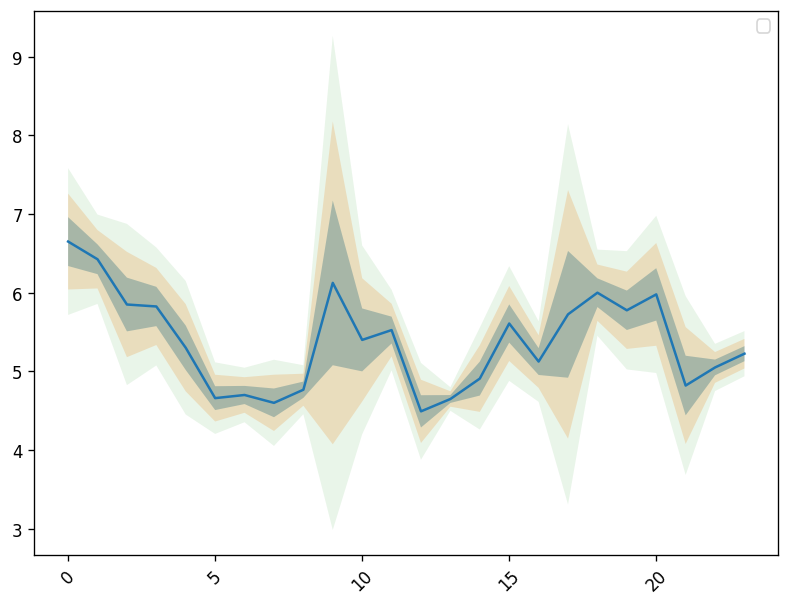

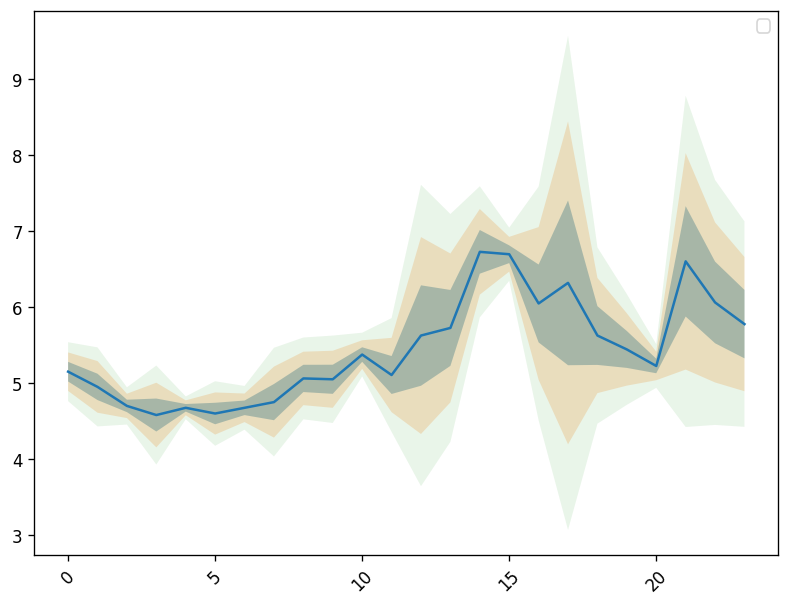

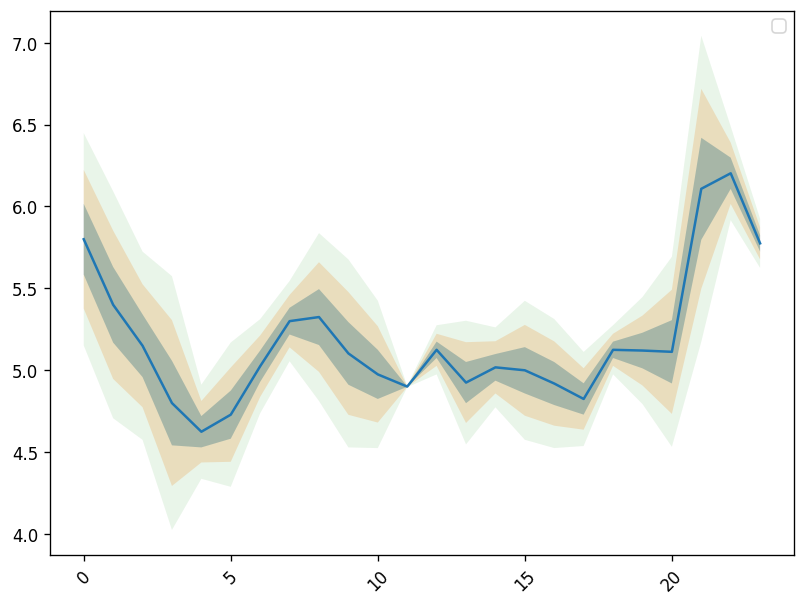

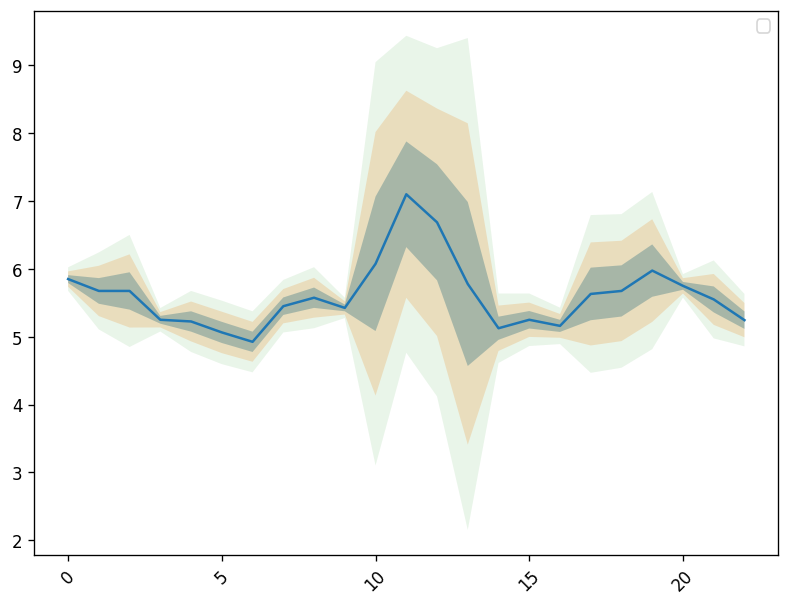

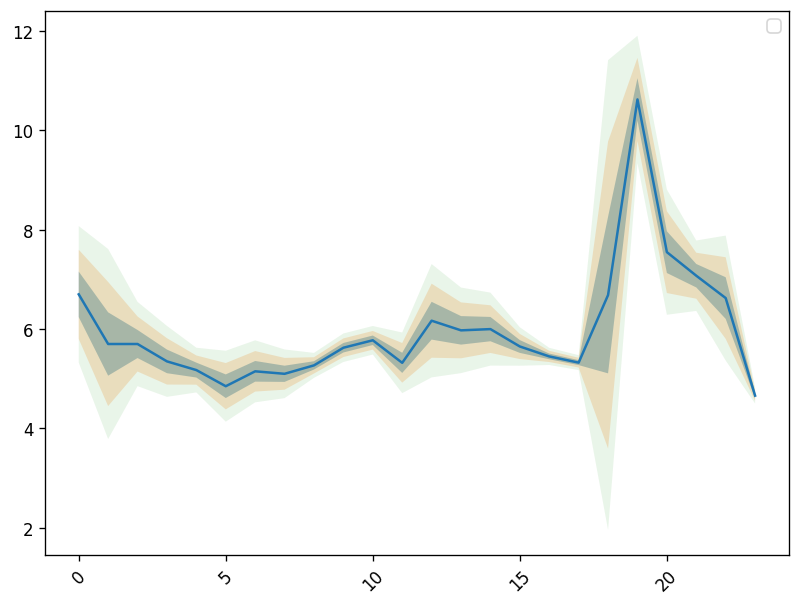

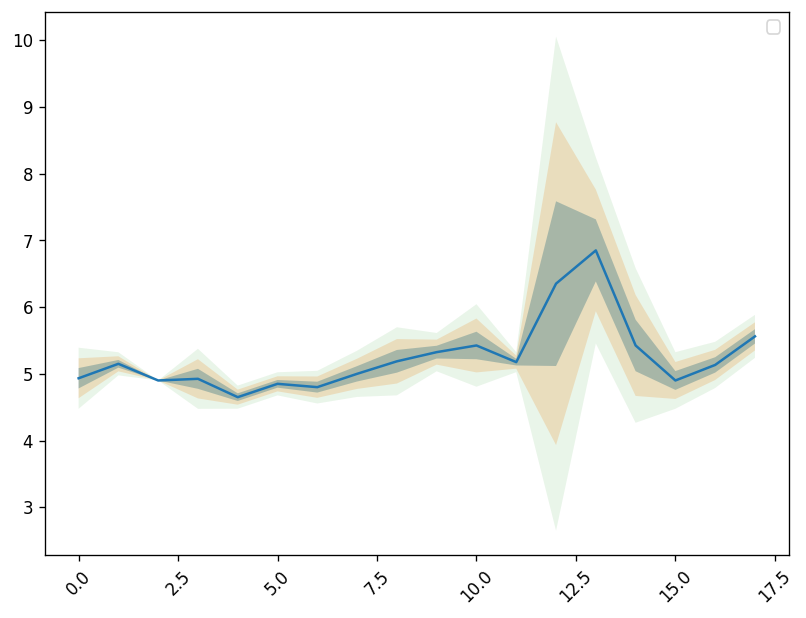

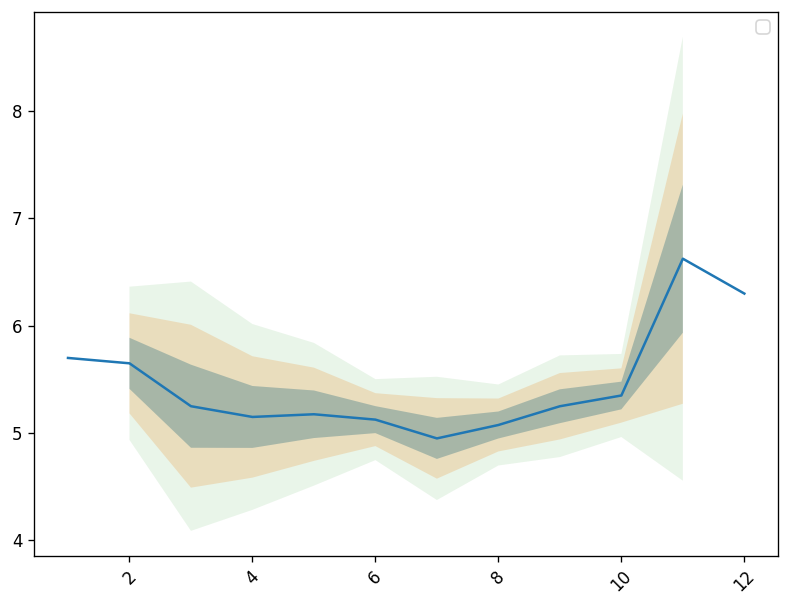

In [123]:
for x in df._date.unique():
    gl.plot_glucose_perc(df.loc[x.strftime('%Y-%m-%d')])

In [6]:
# Set Drivative
df['dg'] = df[gl.G_LBL].diff()
df['dt'] = df['tid'].diff().dt.total_seconds()
df['dg_dt']=df.dg/df.dt
mdf['dg'] = mdf[gl.G_LBL].diff()
mdf['dt'] = mdf['tid'].diff().dt.total_seconds()
mdf['dg_dt']=mdf.dg/mdf.dt


In [24]:

def set_derivative(df, tlbl='tid', glbl=gl.G_LBL):
    df['dg'] = df[glbl].diff()
    df['dt'] = df[tlbl].diff().dt.total_seconds()
    df['dg_dt'] = df.dg / df.dt
    return df

In [26]:
df.columns

Index(['Device', 'Serial Number', 'Device Timestamp', 'Record Type',
       'Historic Glucose mmol/L', 'Scan Glucose mmol/L',
       'Non-numeric Rapid-Acting Insulin', 'Rapid-Acting Insulin (units)',
       'Non-numeric Food', 'Carbohydrates (grams)', 'Carbohydrates (servings)',
       'Non-numeric Long-Acting Insulin', 'Long-Acting Insulin Value (units)',
       'Notes', 'Strip Glucose mmol/L', 'Ketone mmol/L',
       'Meal Insulin (units)', 'Correction Insulin (units)',
       'User Change Insulin (units)', '_date', 'hour', 'dayofweek', 'weekday',
       'weekend', 'tid', 'dg', 'dt', 'dg_dt'],
      dtype='object')

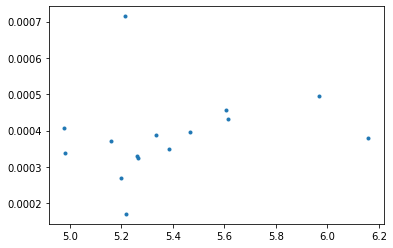

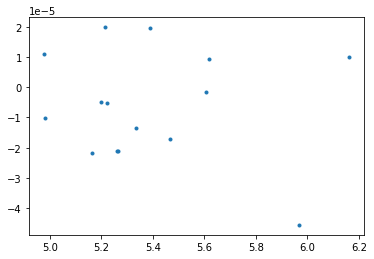

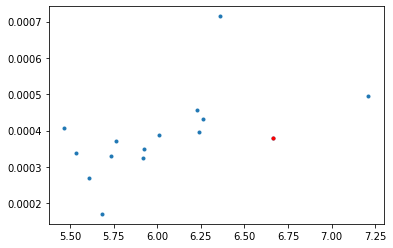

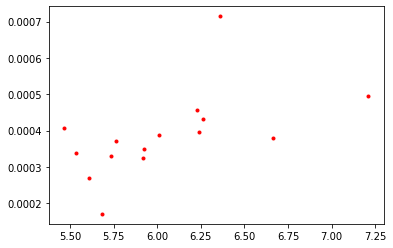

In [43]:
#set_derivative(df)
d=df
G = '_date'
x = d.groupby([G])[gl.G_LBL].mean()
y = d.groupby([G])['dg_dt'].mean() + d.groupby([G])['dg_dt'].std()
plt.plot(x, y, linestyle='none', marker='.')
plt.show()
x = d.groupby([G])[gl.G_LBL].mean()
y = d.groupby([G])['dg_dt'].mean()
plt.plot(x, y, linestyle='none', marker='.')
plt.show()

x = d.groupby([G])[gl.G_LBL].mean() +  d.groupby([G])[gl.G_LBL].std()
y = d.groupby([G])['dg_dt'].mean() + d.groupby([G])['dg_dt'].std()
plt.plot(x, y, linestyle='none', marker='.')
d=df.loc['2020-10-03']
x = d.groupby([G])[gl.G_LBL].mean() +  d.groupby([G])[gl.G_LBL].std()
y = d.groupby([G])['dg_dt'].mean() + d.groupby([G])['dg_dt'].std()
plt.plot(x, y, linestyle='none', marker='.', color='red')
plt.show()
d=df
x = d.groupby([G])[gl.G_LBL].mean() +  d.groupby([G])[gl.G_LBL].std()
y = d.groupby([G])['dg_dt'].mean() + d.groupby([G])['dg_dt'].std()
plt.plot(x, y, linestyle='none', marker='.', color='red')
plt.show()

In [42]:
y.sort_values(ascending=False)
x.sort_values(ascending=False)

NameError: name 'y' is not defined

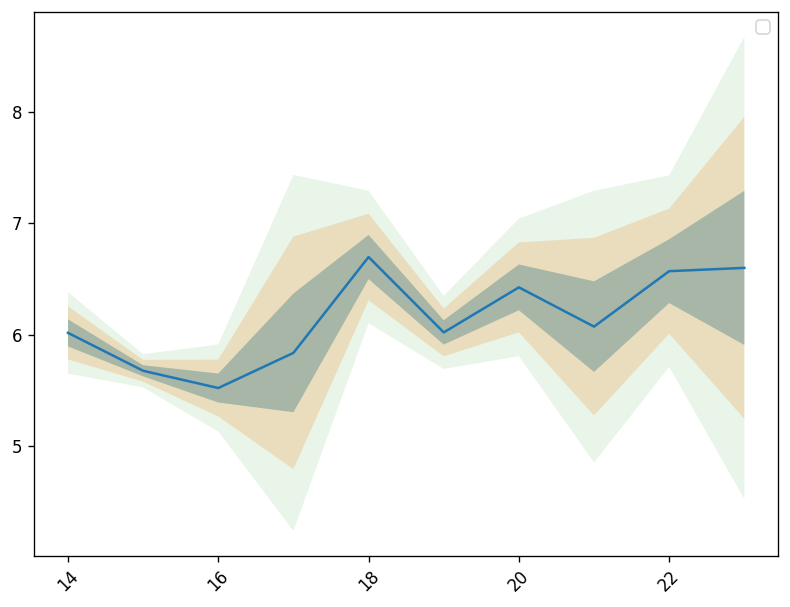

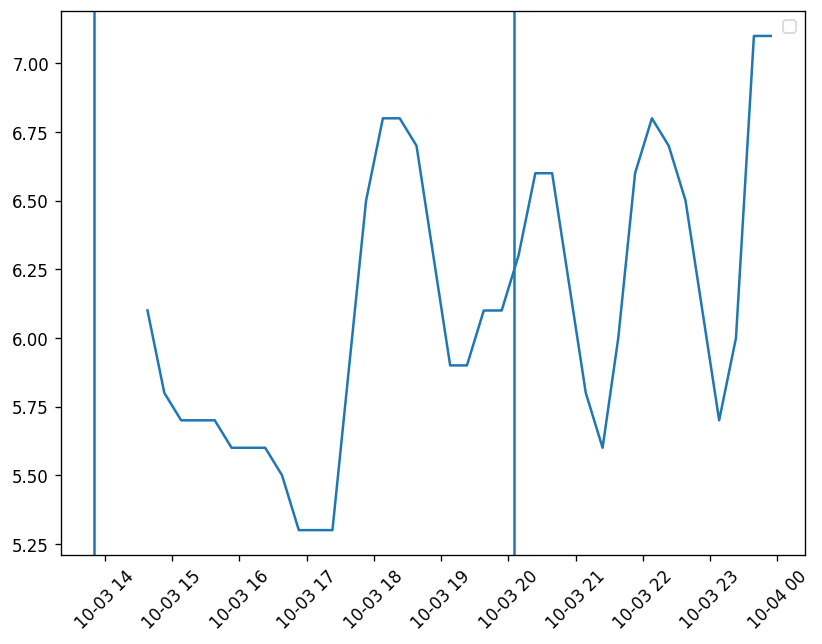

In [8]:
#D = df.loc['']
DAY='2020-10-03'
D = df.loc[DAY]
gl.plot_glucose_perc(D)
gl.start_plot()
plt.plot(D[gl.G_LBL])
gl.plot_meal_lines(meals.loc[DAY])
gl.end_plot()

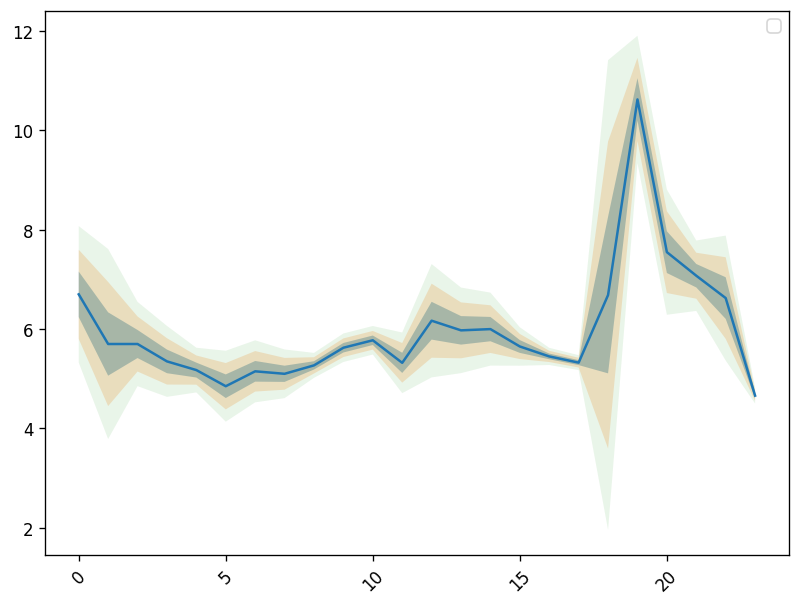

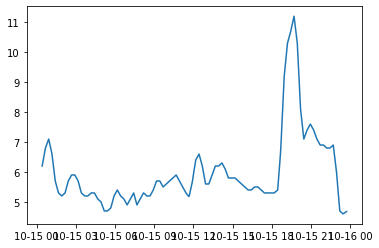

In [45]:
D = df.loc['2020-10-15']
gl.plot_glucose_perc(D)
plt.plot(D[gl.G_LBL])

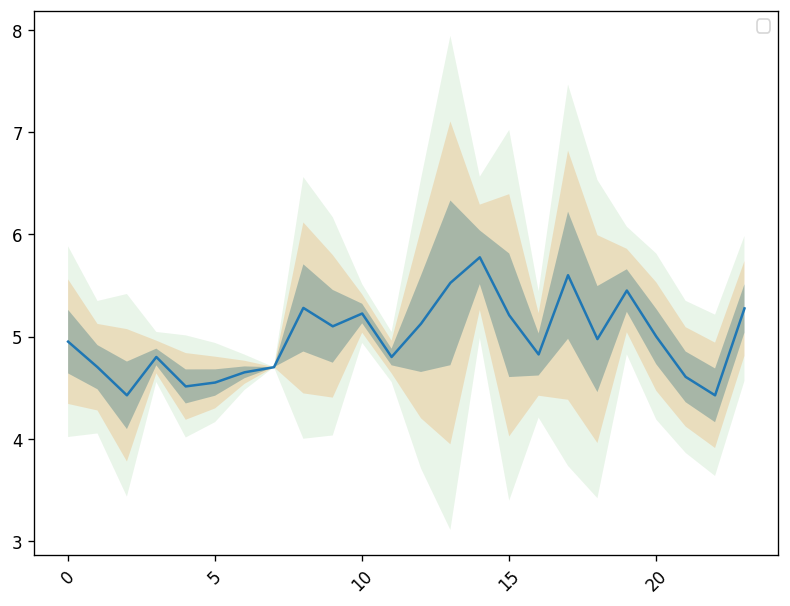

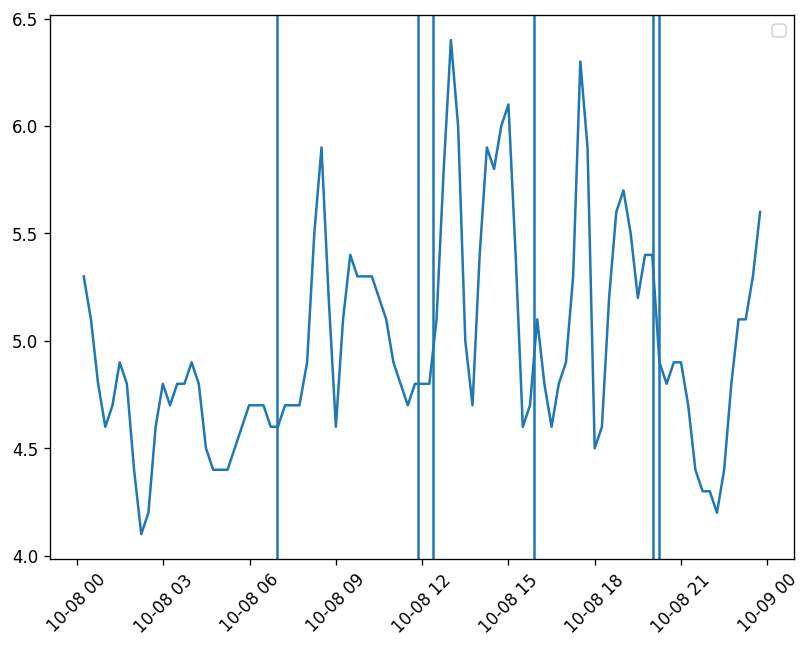

In [17]:
DAY='2020-10-08'
D = df.loc[DAY]
gl.plot_glucose_perc(D)
gl.start_plot()
plt.plot(D[gl.G_LBL])
gl.plot_meal_lines(meals.loc[DAY])
gl.end_plot()

In [56]:
[i[0] for i in meals.iterrows()]

[Timestamp('2020-10-03 22:05:18'),
 Timestamp('2020-10-05 18:06:26'),
 Timestamp('2020-10-05 21:20:10'),
 Timestamp('2020-10-05 18:49:58'),
 Timestamp('2020-10-05 21:19:44'),
 Timestamp('2020-10-05 11:14:56'),
 Timestamp('2020-10-16 11:23:46'),
 Timestamp('2020-10-11 13:34:14'),
 Timestamp('2020-10-14 09:26:40'),
 Timestamp('2020-10-15 17:41:20'),
 Timestamp('2020-10-14 11:20:16'),
 Timestamp('2020-10-16 19:42:26'),
 Timestamp('2020-10-10 15:20:52'),
 Timestamp('2020-10-16 15:25:04'),
 Timestamp('2020-10-14 15:57:08'),
 Timestamp('2020-10-12 16:22:30'),
 Timestamp('2020-10-10 20:34:22'),
 Timestamp('2020-10-11 16:06:00'),
 Timestamp('2020-10-11 19:01:02'),
 Timestamp('2020-10-12 15:25:04'),
 Timestamp('2020-10-10 09:59:04'),
 Timestamp('2020-10-12 19:43:28'),
 Timestamp('2020-10-12 11:14:34'),
 Timestamp('2020-10-10 13:15:06'),
 Timestamp('2020-10-12 11:43:30'),
 Timestamp('2020-10-16 20:49:56'),
 Timestamp('2020-10-11 08:17:54'),
 Timestamp('2020-10-09 14:45:28'),
 Timestamp('2020-10-

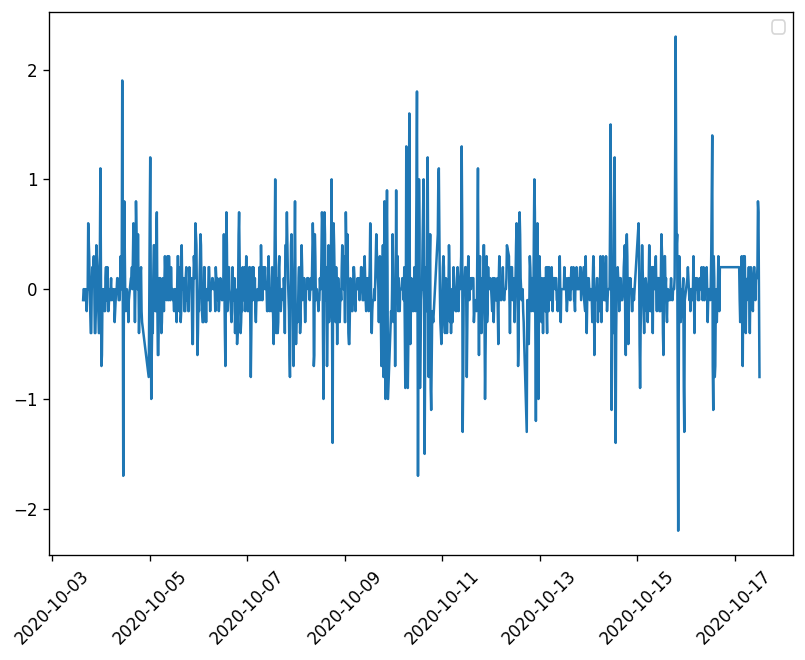

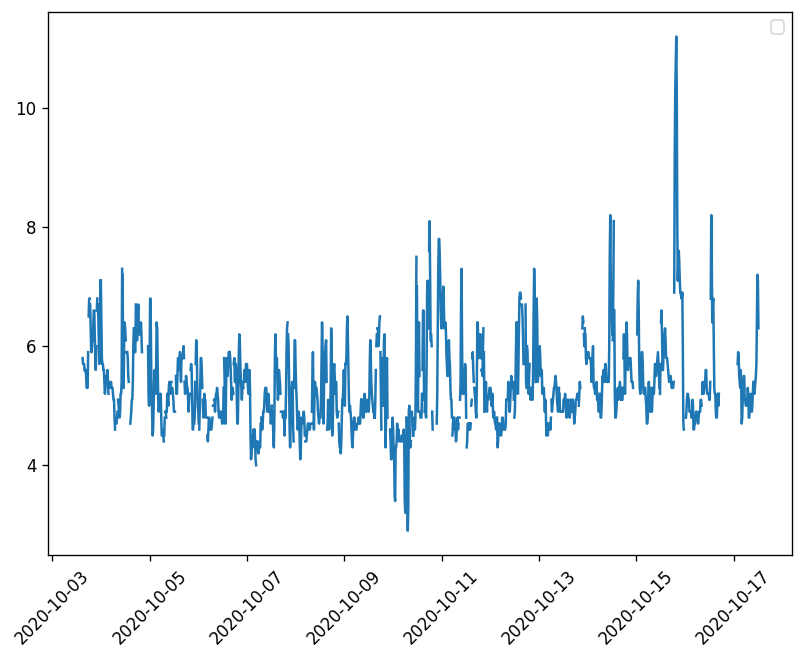

In [21]:
#D = df.loc['2020-10-04']
D = df
gl.start_plot()
plt.plot((D[lb].diff()).dropna())
gl.end_plot()
gl.start_plot()
plt.plot(D[lb])
gl.end_plot()

In [208]:
D[tlbl].diff()

dtime
2020-10-03 14:38:00      NaT
2020-10-03 14:53:00   0 days
2020-10-03 15:08:00   0 days
2020-10-03 15:23:00   0 days
2020-10-03 15:38:00   0 days
                       ...  
2020-10-10 06:30:00   1 days
2020-10-11 12:16:00   1 days
2020-10-14 17:36:00   3 days
2020-10-15 11:39:00   1 days
2020-10-15 11:39:00   0 days
Name: _date, Length: 1450, dtype: timedelta64[ns]

# Sessionizer

````
-----|---30m---|---30m---|-----------1h30m-------|---30m---|---30m---|--------
    event    event      event                  event     event     event
```
* 2 meals, 3events each



```
-----|---------1h--------|----------1h30m--------|--------2h---------|--------
    event              event                  event                event
```
* 3 meals, 2 events first, then 1 event each

```
-----|-10m-|------40m------|-----------1h30m-----|---30m---|---30m---|--------
    event                event                  event     event     event
```
* 2 meals, 2 events first, then 3 events

idx
2020-10-03 15:50:36     1.0
2020-10-03 22:05:18     2.0
2020-10-04 08:47:14     3.0
2020-10-04 14:04:58     4.0
2020-10-04 15:45:54     5.0
2020-10-04 19:56:54     6.0
2020-10-05 11:14:56     7.0
2020-10-05 18:06:26     8.0
2020-10-05 18:49:58     9.0
2020-10-05 20:51:54    10.0
2020-10-05 21:19:44    11.0
2020-10-05 21:20:10    12.0
2020-10-07 19:04:50    13.0
2020-10-08 06:57:48    14.0
2020-10-08 11:52:06    15.0
2020-10-08 12:21:54    16.0
2020-10-08 15:53:16    17.0
2020-10-08 20:00:34    18.0
2020-10-08 20:14:22    19.0
2020-10-09 14:45:28    20.0
2020-10-10 09:59:04    21.0
2020-10-10 13:15:06    22.0
2020-10-10 15:20:52    23.0
2020-10-10 20:34:22    24.0
2020-10-11 08:17:54    25.0
2020-10-11 08:18:00    26.0
2020-10-11 13:34:14    27.0
2020-10-11 16:06:00    28.0
2020-10-11 19:01:02    29.0
2020-10-12 11:14:34    30.0
2020-10-12 11:43:30    31.0
2020-10-12 15:25:04    32.0
2020-10-12 16:22:30    33.0
2020-10-12 19:43:28    34.0
2020-10-14 09:26:40    35.0
2020-10-14 11:20

In [150]:
meals

day  hour  minute  time_fmt time_str               ctime  \
idx                                                                             
2020-10-03 15:50:36    3    15      50      1550    15:50 2020-10-03 15:50:36   
2020-10-03 22:05:18    3    22       5      2205     22:5 2020-10-03 22:05:18   
2020-10-04 08:47:14    4     8      47       847     8:47 2020-10-04 08:47:14   
2020-10-04 14:04:58    4    14       4      1404     14:4 2020-10-04 14:04:58   
2020-10-04 15:45:54    4    15      45      1545    15:45 2020-10-04 15:45:54   
2020-10-04 19:56:54    4    19      56      1956    19:56 2020-10-04 19:56:54   
2020-10-05 11:14:56    5    11      14      1114    11:14 2020-10-05 11:14:56   
2020-10-05 18:06:26    5    18       6      1806     18:6 2020-10-05 18:06:26   
2020-10-05 18:49:58    5    18      49      1849    18:49 2020-10-05 18:49:58   
2020-10-05 20:51:54    5    20      51      2051    20:51 2020-10-05 20:51:54   
2020-10-05 21:19:44    5    21      19      2119    21:19 2020-10-05 21:19:44   
2020-10-05 21:20:10    5    21      20      2120    21:20 2020-10-05 21:20:10   
2020-10-07 19:04:50    7    19       4      1904     19:4 2020-10-07 19:04:50   
2020-10-08 06:57:48    8     6      57       657     6:57 2020-10-08 06:57:48   
2020-10-08 11:52:06    8    11      52      1152    11:52 2020-10-08 11:52:06   
2020-10-08 12:21:54    8    12      21      1221    12:21 2020-10-08 12:21:54   
2020-10-08 15:53:16    8    15      53      1553    15:53 2020-10-08 15:53:16   
2020-10-08 20:00:34    8    20       0      2000     20:0 2020-10-08 20:00:34   
2020-10-08 20:14:22    8    20      14      2014    20:14 2020-10-08 20:14:22   
2020-10-09 14:45:28    9    14      45      1445    14:45 2020-10-09 14:45:28   
2020-10-10 09:59:04   10     9      59       959     9:59 2020-10-10 09:59:04   
2020-10-10 13:15:06   10    13      15      1315    13:15 2020-10-10 13:15:06   
2020-10-10 15:20:52   10    15      20      1520    15:20 2020-10-10 15:20:52   
2020-10-10 20:34:22   10    20      34      2034    20:34 2020-10-10 20:34:22   
2020-10-11 08:17:54   11     8      17       817     8:17 2020-10-11 08:17:54   
2020-10-11 08:18:00   11     8      18       818     8:18 2020-10-11 08:18:00   
2020-10-11 13:34:14   11    13      34      1334    13:34 2020-10-11 13:34:14   
2020-10-11 16:06:00   11    16       6      1606     16:6 2020-10-11 16:06:00   
2020-10-11 19:01:02   11    19       1      1901     19:1 2020-10-11 19:01:02   
2020-10-12 11:14:34   12    11      14      1114    11:14 2020-10-12 11:14:34   
2020-10-12 11:43:30   12    11      43      1143    11:43 2020-10-12 11:43:30   
2020-10-12 15:25:04   12    15      25      1525    15:25 2020-10-12 15:25:04   
2020-10-12 16:22:30   12    16      22      1622    16:22 2020-10-12 16:22:30   
2020-10-12 19:43:28   12    19      43      1943    19:43 2020-10-12 19:43:28   
2020-10-14 09:26:40   14     9      26       926     9:26 2020-10-14 09:26:40   
2020-10-14 11:20:16   14    11      20      1120    11:20 2020-10-14 11:20:16   
2020-10-14 15:57:08   14    15      57      1557    15:57 2020-10-14 15:57:08   
2020-10-15 17:41:20   15    17      41      1741    17:41 2020-10-15 17:41:20   
2020-10-16 11:23:46   16    11      23      1123    11:23 2020-10-16 11:23:46   
2020-10-16 15:25:04   16    15      25      1525    15:25 2020-10-16 15:25:04   
2020-10-16 19:42:26   16    19      42      1942    19:42 2020-10-16 19:42:26   
2020-10-16 20:49:56   16    20      49      2049    20:49 2020-10-16 20:49:56   

                          cdate      filename        dt  session_start  \
idx                                                                      
2020-10-03 15:50:36  2020-10-03  IMG_0387.jpg       NaN           True   
2020-10-03 22:05:18  2020-10-03  IMG_0389.jpg   22482.0           True   
2020-10-04 08:47:14  2020-10-04  IMG_0390.jpg   38516.0           True   
2020-10-04 14:04:58  2020-10-04  IMG_0391.jpg   19064.0           True   
2020-10-04 1

In [79]:
df.loc[nearest(df, meals.index[0])][gl.G_LBL]

5.3

In [110]:
idf4=mdf.loc['2020':'2020-04-23']
len(idf4._date.unique())

15

In [95]:
idf=mdf.loc['2020-05-19':'2020-06-02']
len(idf._date.unique())

15

In [101]:
idf2=mdf.loc['2019-12-05':'2019-12-19']
idf3=mdf.loc['2020-05-04':'2020-05-18']
len(idf3._date.unique())

15

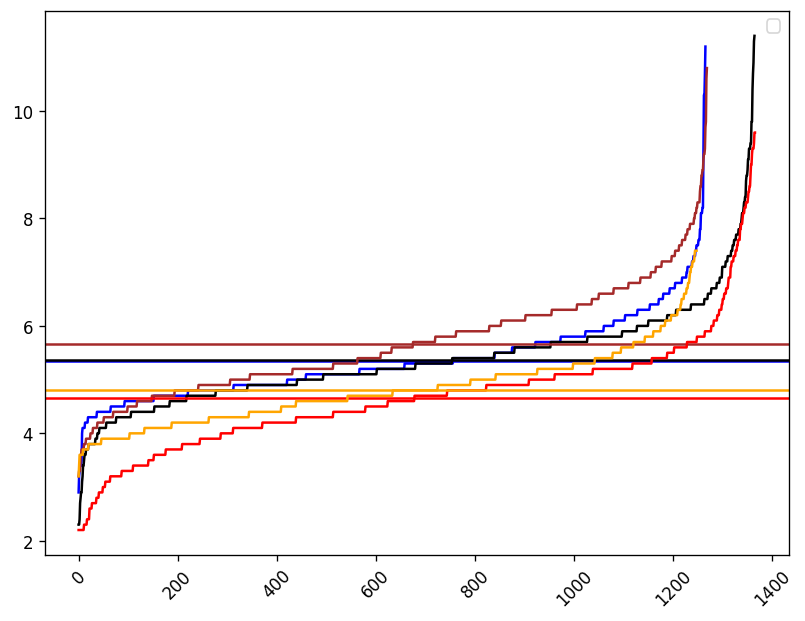

In [116]:
gl.start_plot()
plt.plot(np.array(df.sort_values(gl.G_LBL)[gl.G_LBL]), color='blue')
plt.axhline(y=df[gl.G_LBL].mean(), color='blue')
plt.plot(np.array(idf.sort_values(gl.G_LBL)[gl.G_LBL]), color='black')
plt.axhline(y=idf[gl.G_LBL].mean(), color='black')
plt.plot(np.array(idf2.sort_values(gl.G_LBL)[gl.G_LBL]), color='brown')
plt.axhline(y=idf2[gl.G_LBL].mean(), color='brown')
plt.plot(np.array(idf3.sort_values(gl.G_LBL)[gl.G_LBL]), color='red')
plt.axhline(y=idf3[gl.G_LBL].mean(), color='red')
plt.plot(np.array(idf4.sort_values(gl.G_LBL)[gl.G_LBL]), color='orange')
plt.axhline(y=idf4[gl.G_LBL].mean(), color='orange')
gl.end_plot()

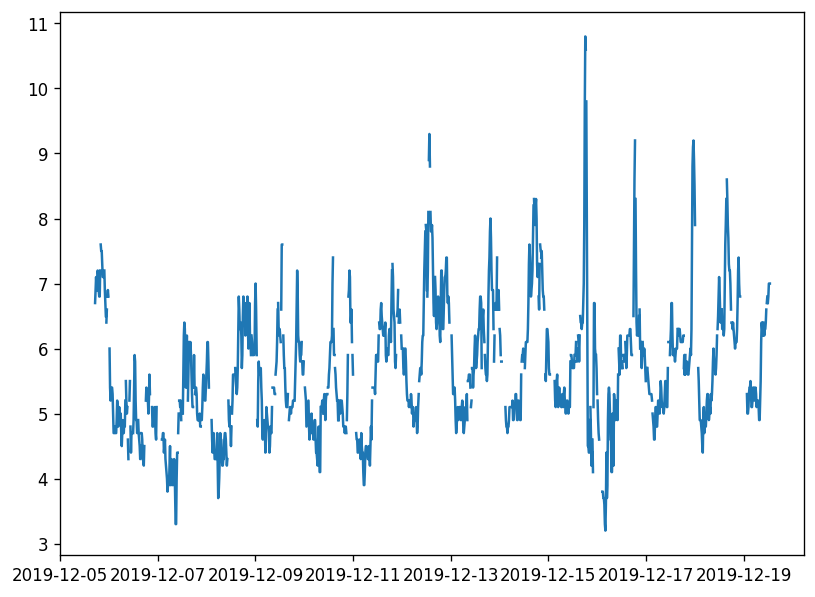

In [105]:
gl.start_plot()
plt.plot(idf2[gl.G_LBL])

# Find peak for meal

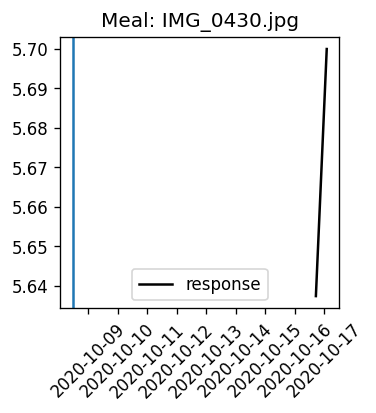

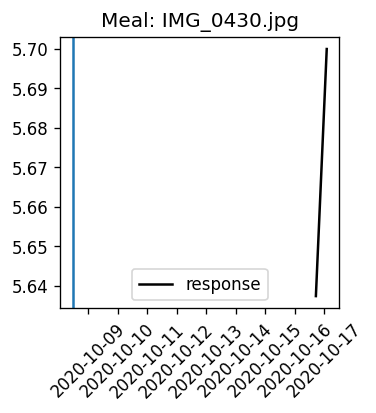

In [124]:
M = 'IMG_0430.jpg'
meal = meals_byname.loc[M]

mtime= meal.ctime
nt = nearest(df, mtime)

gl.start_plot(3,3)

plt.plot(df.loc[nmin:nmax][gl.G_LBL], label='response', color='black')
plt.title('Meal: {}'.format(M))
plt.axvline(x=meal.ctime)
gl.end_plot()


M = 'IMG_0430.jpg'
meal = meals_byname.loc[M]

mtime= meal.ctime
nt = nearest(df, mtime)

gl.start_plot(3,3)

plt.plot(df.loc[nmin:nmax][gl.G_LBL], label='response', color='black')
plt.title('Meal: {}'.format(M))
plt.axvline(x=meal.ctime)
gl.end_plot()

In [79]:
gl.set_derivative(df)
gl.set_derivative(mdf)
df['dg_dt']

dtime
2020-10-03 13:36:00         NaN
2020-10-03 14:38:00         NaN
2020-10-03 14:40:00         NaN
2020-10-03 14:40:00         NaN
2020-10-03 14:40:00         NaN
                         ...   
2020-10-17 11:59:00   -0.000111
2020-10-17 12:14:00   -0.000889
2020-10-17 12:16:00         NaN
2020-10-17 12:39:00         NaN
2020-10-17 12:43:00         NaN
Name: dg_dt, Length: 1450, dtype: float64

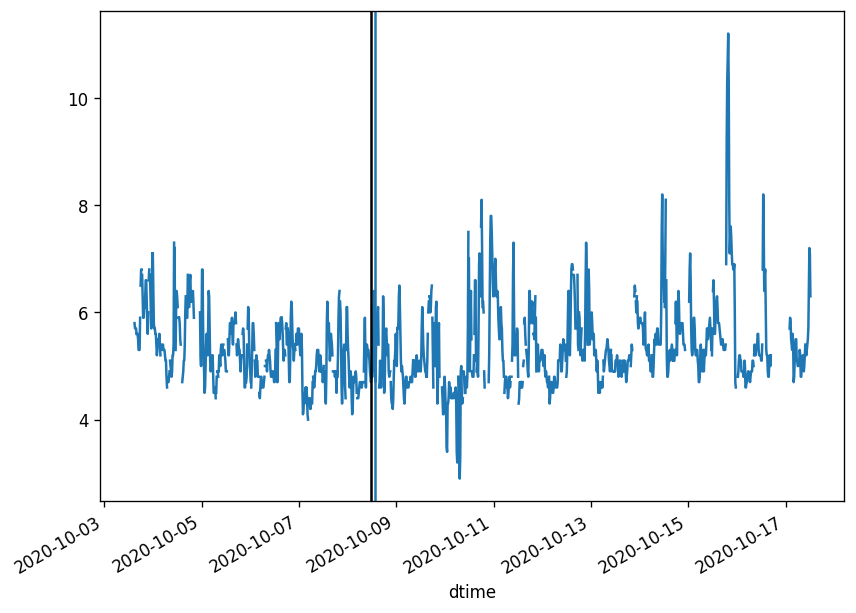

In [75]:
gl.start_plot()
df[gl.G_LBL].plot()
plt.axvline(x = nearest(df, xmax))
plt.axvline(x =xmin, color='black')

In [12]:
meals

day  hour  minute  time_fmt time_str               ctime  \
idx                                                                             
2020-10-03 15:50:36    3    15      50      1550    15:50 2020-10-03 15:50:36   
2020-10-03 22:05:18    3    22       5      2205     22:5 2020-10-03 22:05:18   
2020-10-04 08:47:14    4     8      47       847     8:47 2020-10-04 08:47:14   
2020-10-04 14:04:58    4    14       4      1404     14:4 2020-10-04 14:04:58   
2020-10-04 15:45:54    4    15      45      1545    15:45 2020-10-04 15:45:54   
2020-10-04 19:56:54    4    19      56      1956    19:56 2020-10-04 19:56:54   
2020-10-05 11:14:56    5    11      14      1114    11:14 2020-10-05 11:14:56   
2020-10-05 18:06:26    5    18       6      1806     18:6 2020-10-05 18:06:26   
2020-10-05 18:49:58    5    18      49      1849    18:49 2020-10-05 18:49:58   
2020-10-05 20:51:54    5    20      51      2051    20:51 2020-10-05 20:51:54   
2020-10-05 21:19:44    5    21      19      2119    21:19 2020-10-05 21:19:44   
2020-10-05 21:20:10    5    21      20      2120    21:20 2020-10-05 21:20:10   
2020-10-07 19:04:50    7    19       4      1904     19:4 2020-10-07 19:04:50   
2020-10-08 06:57:48    8     6      57       657     6:57 2020-10-08 06:57:48   
2020-10-08 11:52:06    8    11      52      1152    11:52 2020-10-08 11:52:06   
2020-10-08 12:21:54    8    12      21      1221    12:21 2020-10-08 12:21:54   
2020-10-08 15:53:16    8    15      53      1553    15:53 2020-10-08 15:53:16   
2020-10-08 20:00:34    8    20       0      2000     20:0 2020-10-08 20:00:34   
2020-10-08 20:14:22    8    20      14      2014    20:14 2020-10-08 20:14:22   
2020-10-09 14:45:28    9    14      45      1445    14:45 2020-10-09 14:45:28   
2020-10-10 09:59:04   10     9      59       959     9:59 2020-10-10 09:59:04   
2020-10-10 13:15:06   10    13      15      1315    13:15 2020-10-10 13:15:06   
2020-10-10 15:20:52   10    15      20      1520    15:20 2020-10-10 15:20:52   
2020-10-10 20:34:22   10    20      34      2034    20:34 2020-10-10 20:34:22   
2020-10-11 08:17:54   11     8      17       817     8:17 2020-10-11 08:17:54   
2020-10-11 08:18:00   11     8      18       818     8:18 2020-10-11 08:18:00   
2020-10-11 13:34:14   11    13      34      1334    13:34 2020-10-11 13:34:14   
2020-10-11 16:06:00   11    16       6      1606     16:6 2020-10-11 16:06:00   
2020-10-11 19:01:02   11    19       1      1901     19:1 2020-10-11 19:01:02   
2020-10-12 11:14:34   12    11      14      1114    11:14 2020-10-12 11:14:34   
2020-10-12 11:43:30   12    11      43      1143    11:43 2020-10-12 11:43:30   
2020-10-12 15:25:04   12    15      25      1525    15:25 2020-10-12 15:25:04   
2020-10-12 16:22:30   12    16      22      1622    16:22 2020-10-12 16:22:30   
2020-10-12 19:43:28   12    19      43      1943    19:43 2020-10-12 19:43:28   
2020-10-14 09:26:40   14     9      26       926     9:26 2020-10-14 09:26:40   
2020-10-14 11:20:16   14    11      20      1120    11:20 2020-10-14 11:20:16   
2020-10-14 15:57:08   14    15      57      1557    15:57 2020-10-14 15:57:08   
2020-10-15 17:41:20   15    17      41      1741    17:41 2020-10-15 17:41:20   
2020-10-16 11:23:46   16    11      23      1123    11:23 2020-10-16 11:23:46   
2020-10-16 15:25:04   16    15      25      1525    15:25 2020-10-16 15:25:04   
2020-10-16 19:42:26   16    19      42      1942    19:42 2020-10-16 19:42:26   
2020-10-16 20:49:56   16    20      49      2049    20:49 2020-10-16 20:49:56   

                          cdate      filename        dt  session_start  \
idx                                                                      
2020-10-03 15:50:36  2020-10-03  IMG_0387.jpg       NaN           True   
2020-10-03 22:05:18  2020-10-03  IMG_0389.jpg   22482.0           True   
2020-10-04 08:47:14  2020-10-04  IMG_0390.jpg   38516.0           True   
2020-10-04 14:04:58  2020-10-04  IMG_0391.jpg   19064.0           True   
2020-10-04 1

In [125]:

def get_meal_bounds(m_id):
    m_all = meals_byid.loc[m_id]
    if type(m_all) == pd.DataFrame:
        ct = m_all.ctime
        xmin = ct.min()
        xmax = ct.max()
        name = ' '.join(list(m_all.filename))
        all_x = list(ct)
    else:
        xmin = m_all.ctime
        xmax = m_all.ctime
        name = m_all.filename
        all_x = [xmin]
    small = S/(60*9)
    nmax = xmax+td(minutes=S/60-small)  
    nmin = xmin-td(minutes=small)
    
    

    return xmin, xmax, nmin, nmax, name, all_x, m_all
        

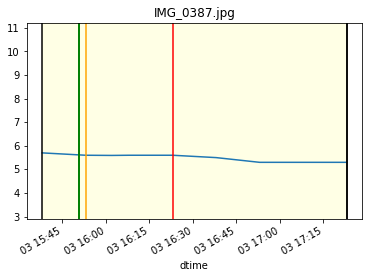

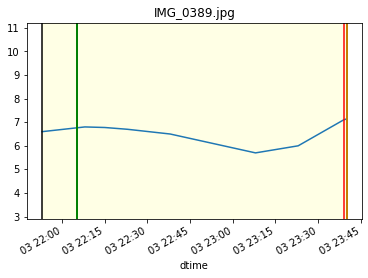

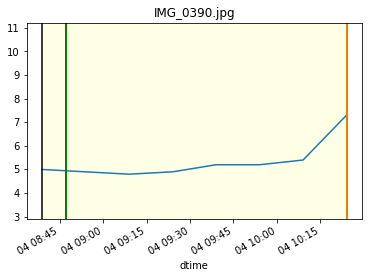

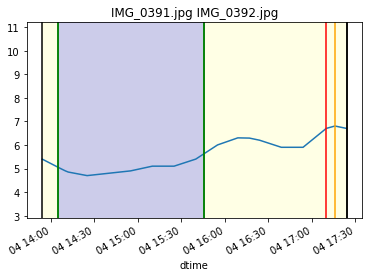

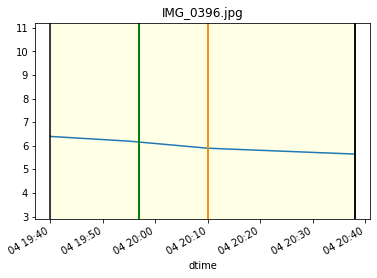

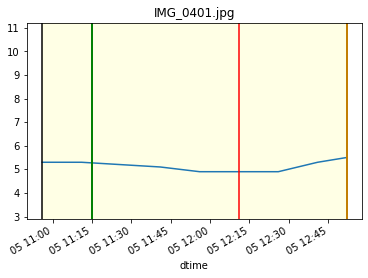

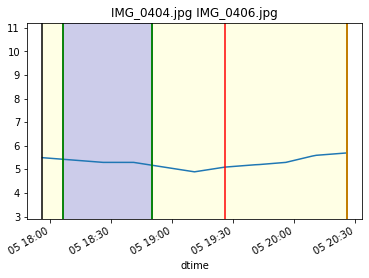

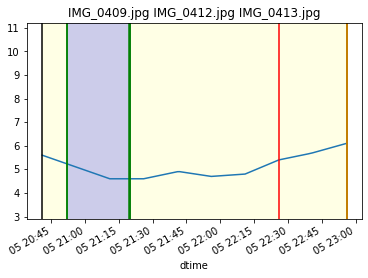

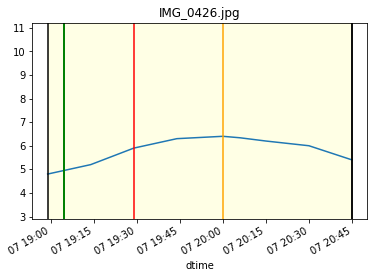

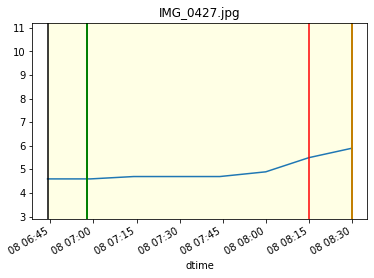

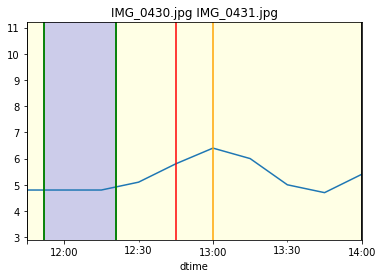

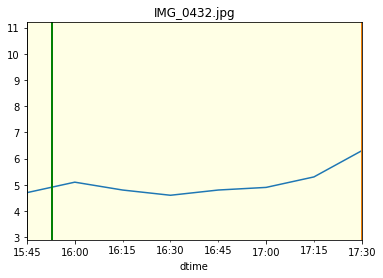

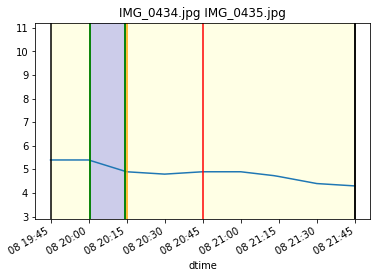

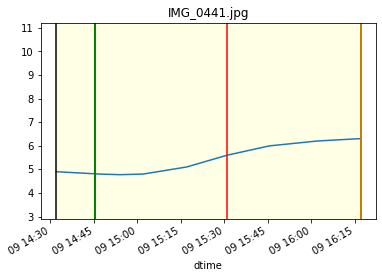

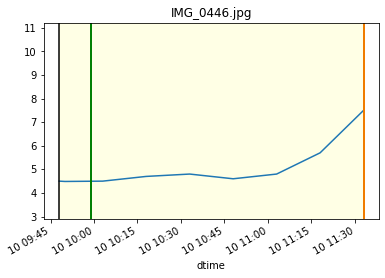

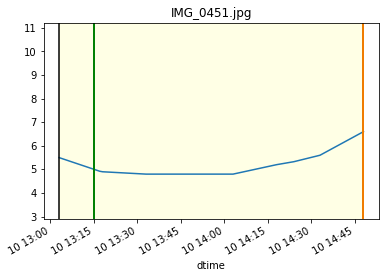

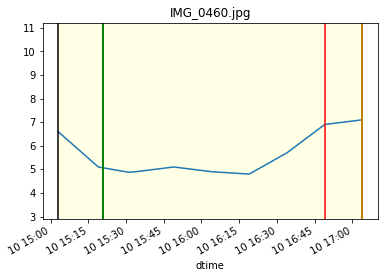

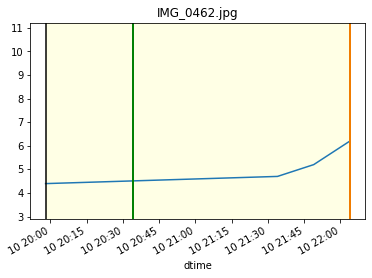

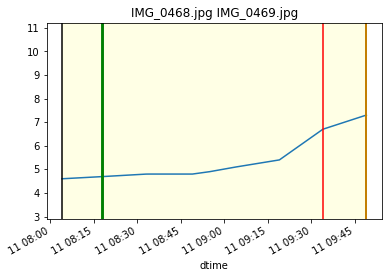

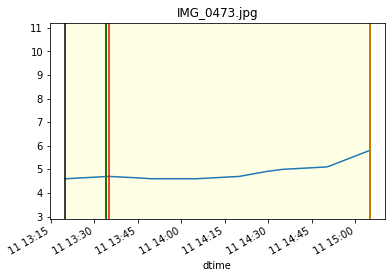

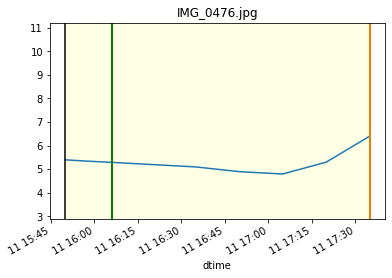

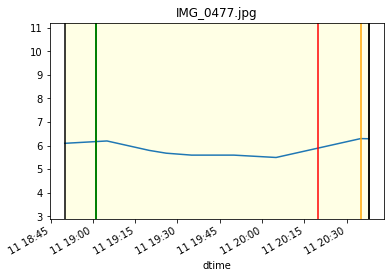

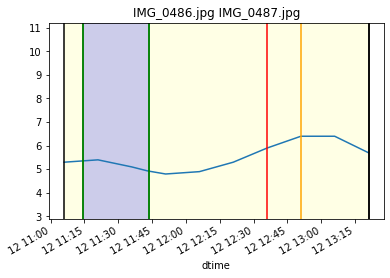

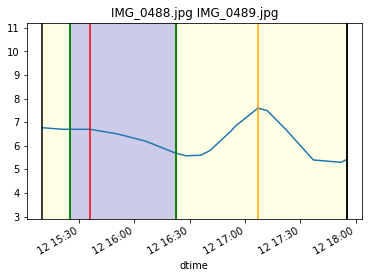

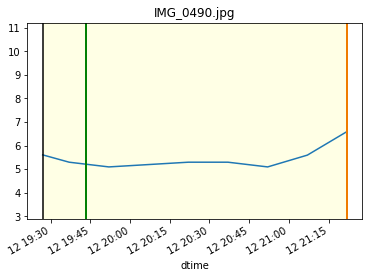

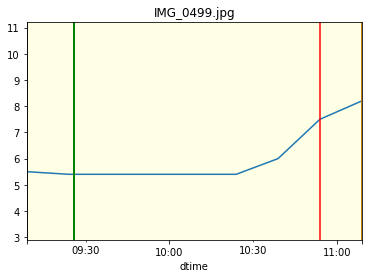

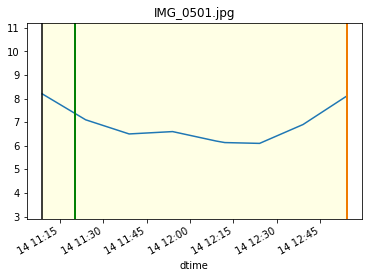

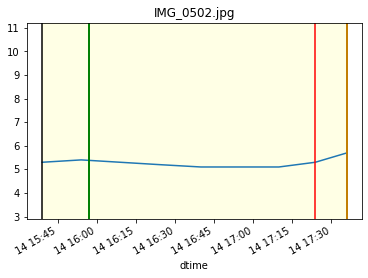

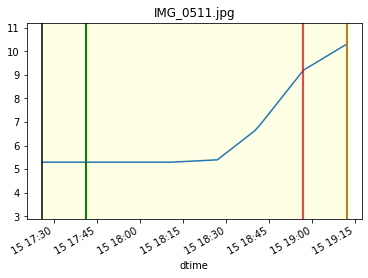

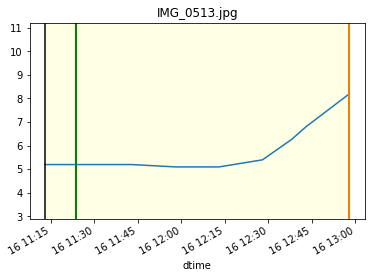

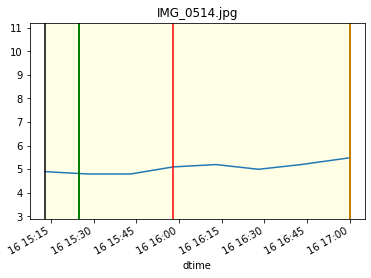

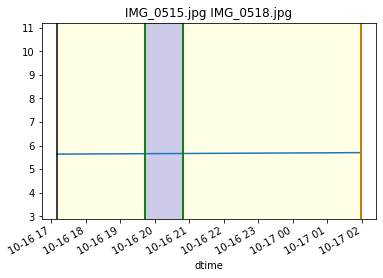

In [126]:
for i in meals_byid.index.unique():
    m_min, m_max, min_lim, max_lim, name, all_x, m_all = get_meal_bounds(i)
    nmin=nearest(df, min_lim)
    nmax=nearest(df, max_lim)
    meal_gl = df.loc[nmin:nmax][gl.G_LBL]

    meal_gl.plot()
    df.loc[nmin:nmax].dg_dt.plot()
    plt.axvline(nmin, color='black')
    plt.axvline(nmax, color='black')
    plt.axvline(nmax, color='black')
    #plt.fill_between([nmin, nmax], [meal_gl.max(), meal_gl.max()], [meal_gl.min(), meal_gl.min()], alpha=0.2)
    plt.axvspan(nmin, nmax, color='yellow', alpha=0.1)
    plt.axvline(m_min, color='green')
    plt.axvline(m_max, color='green')
    for x in all_x:
        plt.axvline(x, color='green')
    plt.axvspan(m_min, m_max, color='blue', alpha=0.2)
    
    derivmax_i = df.loc[m_min:nmax]['dg_dt'].idxmax()

    plt.axvline(derivmax_i, color='red')
    
    peak_i = df.loc[m_min:nmax][gl.G_LBL].idxmax()
    plt.ylim(df[gl.G_LBL].min(), df[gl.G_LBL].max())
    plt.axvline(peak_i, color='orange')
    plt.title(name)
    plt.show()

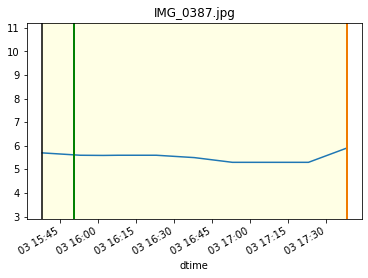

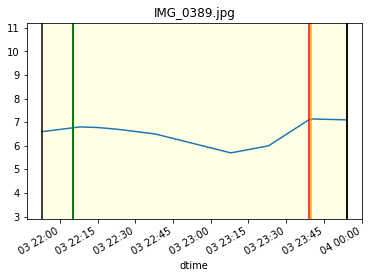

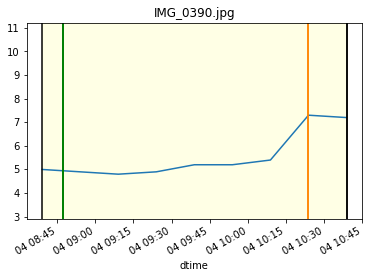

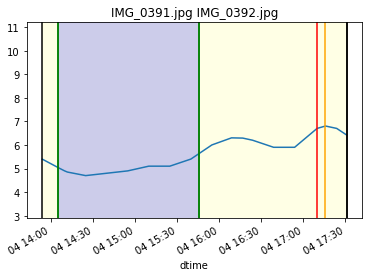

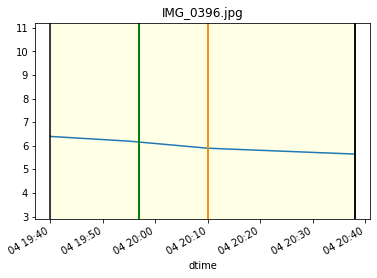

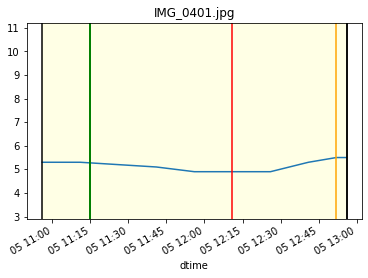

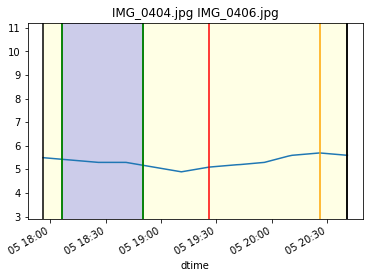

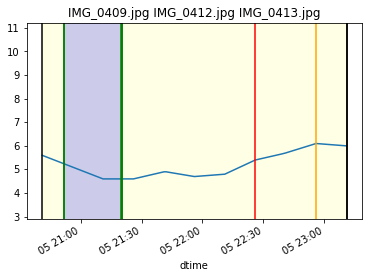

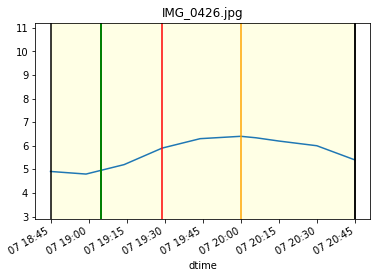

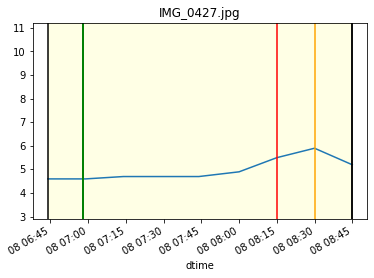

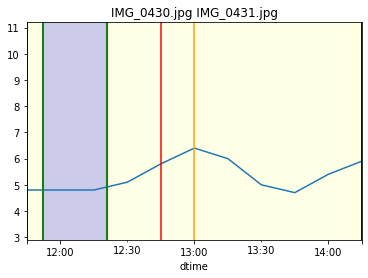

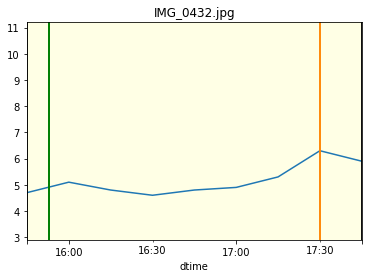

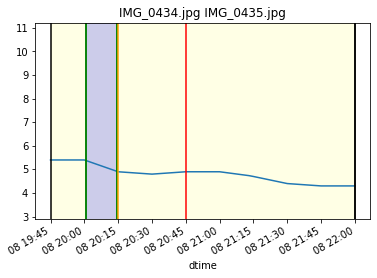

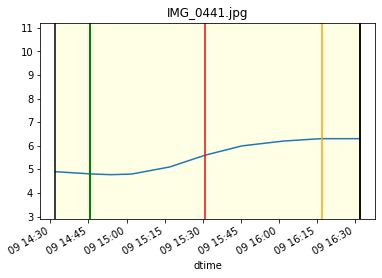

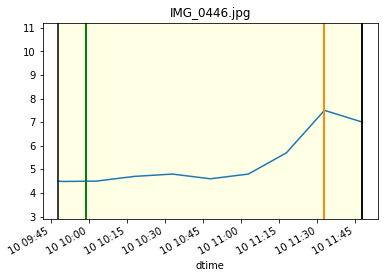

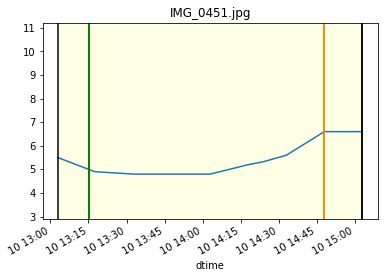

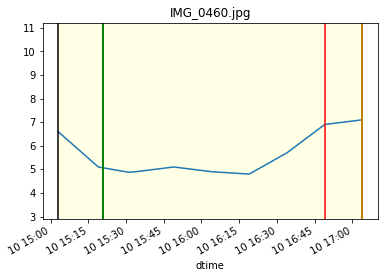

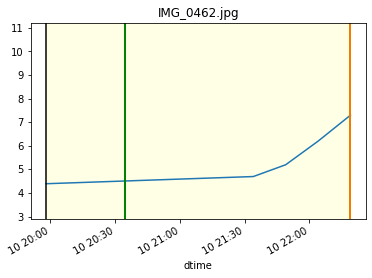

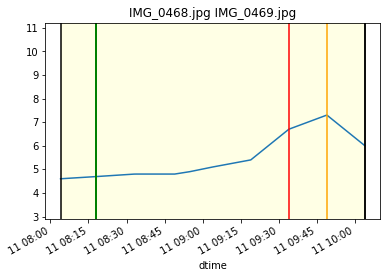

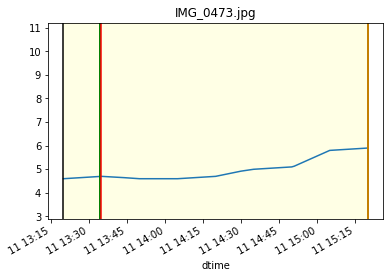

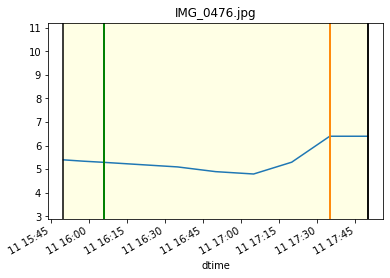

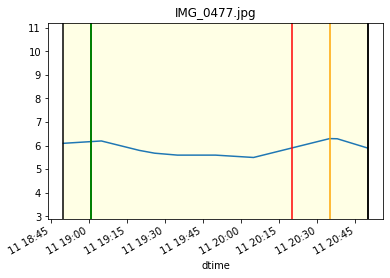

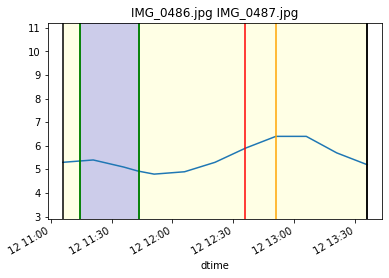

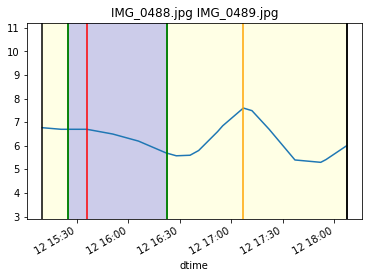

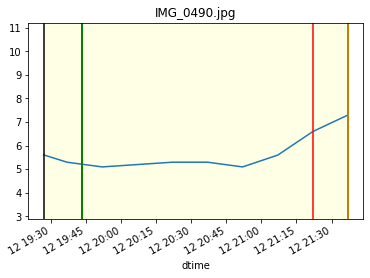

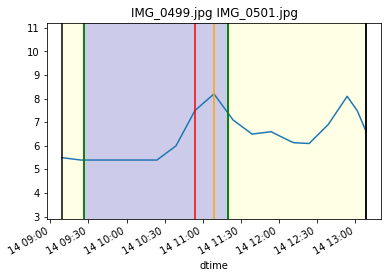

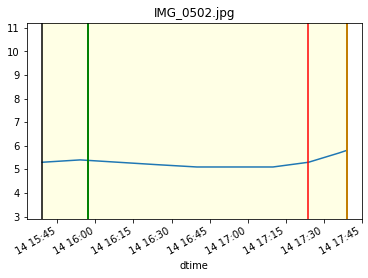

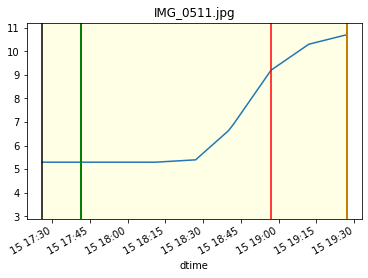

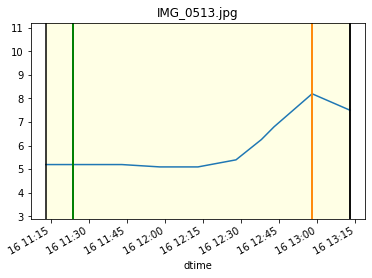

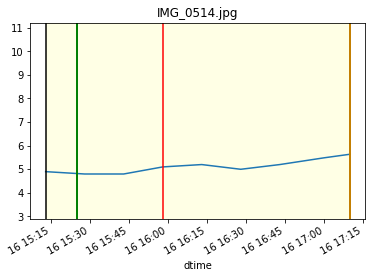

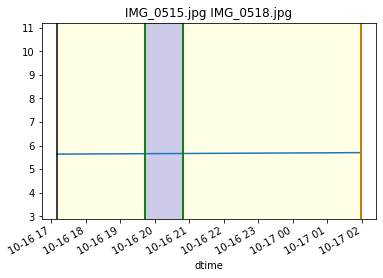

In [165]:
bypeak = []
for i in meals_byid.index.unique():
    m_min, m_max, min_lim, max_lim, name, all_x, m_all = get_meal_bounds(i)
    nmin=nearest(df, min_lim)
    nmax=nearest(df, max_lim)
    meal_gl = df.loc[nmin:nmax][gl.G_LBL]

    meal_gl.plot()
    df.loc[nmin:nmax].dg_dt.plot()
    plt.axvline(nmin, color='black')
    plt.axvline(nmax, color='black')
    plt.axvline(nmax, color='black')
    #plt.fill_between([nmin, nmax], [meal_gl.max(), meal_gl.max()], [meal_gl.min(), meal_gl.min()], alpha=0.2)
    plt.axvspan(nmin, nmax, color='yellow', alpha=0.1)
    plt.axvline(m_min, color='green')
    plt.axvline(m_max, color='green')
    for x in all_x:
        plt.axvline(x, color='green')
    plt.axvspan(m_min, m_max, color='blue', alpha=0.2)
    
    derivmax_i = df.loc[m_min:nmax]['dg_dt'].idxmax()

    plt.axvline(derivmax_i, color='red')
    peak = df.loc[m_min:nmax][gl.G_LBL].max()
    
    peak_i = df.loc[m_min:nmax][gl.G_LBL].idxmax()
    low = df.loc[nmin:peak_i][gl.G_LBL].min()
    diff = peak-low
    plt.ylim(df[gl.G_LBL].min(), df[gl.G_LBL].max())
    plt.axvline(peak_i, color='orange')
    plt.title(name)
    plt.show()
    bypeak.append((name, peak, i, nmin, m_min, diff))

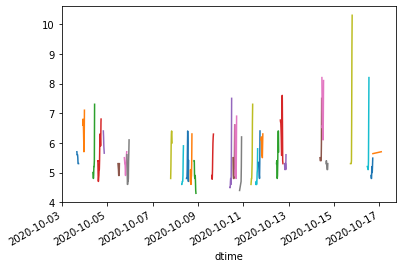

In [276]:
bypeak = []
for i in meals_byid.index.unique():
    m_min, m_max, min_lim, max_lim, name, all_x, m_all = get_meal_bounds(i)
    nmin=nearest(df, min_lim)
    nmax=nearest(df, max_lim)
    meal_gl = df.loc[nmin:nmax][gl.G_LBL]

    meal_gl.plot()
    derivmax_i = df.loc[m_min:nmax]['dg_dt'].idxmax()

    peak = df.loc[m_min:nmax][gl.G_LBL].max()
    peak_i = df.loc[m_min:nmax][gl.G_LBL].idxmax()
    
    low = df.loc[nmin:peak_i][gl.G_LBL].min()
    diff = peak-low
    bypeak.append((name, peak, i, nmin, m_min, diff))

In [277]:
bypeak

[('IMG_0387.jpg',
  5.6,
  1,
  Timestamp('2020-10-03 15:38:00'),
  Timestamp('2020-10-03 15:50:36'),
  0.0),
 ('IMG_0389.jpg',
  7.1,
  2,
  Timestamp('2020-10-03 21:53:00'),
  Timestamp('2020-10-03 22:05:18'),
  1.3999999999999995),
 ('IMG_0390.jpg',
  7.3,
  3,
  Timestamp('2020-10-04 08:39:00'),
  Timestamp('2020-10-04 08:47:14'),
  2.5),
 ('IMG_0391.jpg IMG_0392.jpg',
  6.801649622851378,
  4,
  Timestamp('2020-10-04 13:54:00'),
  Timestamp('2020-10-04 14:04:58'),
  2.1016496228513777),
 ('IMG_0396.jpg',
  5.9,
  5,
  Timestamp('2020-10-04 19:40:00'),
  Timestamp('2020-10-04 19:56:54'),
  0.0),
 ('IMG_0401.jpg',
  5.3,
  6,
  Timestamp('2020-10-05 11:11:00'),
  Timestamp('2020-10-05 11:14:56'),
  0.39999999999999947),
 ('IMG_0404.jpg IMG_0406.jpg',
  5.7,
  7,
  Timestamp('2020-10-05 17:56:00'),
  Timestamp('2020-10-05 18:06:26'),
  0.7999999999999998),
 ('IMG_0409.jpg IMG_0412.jpg IMG_0413.jpg',
  6.1,
  8,
  Timestamp('2020-10-05 20:41:00'),
  Timestamp('2020-10-05 20:51:54'),
 

In [278]:
bypeak.sort(key=lambda x: x[1])

<BarContainer object of 32 artists>

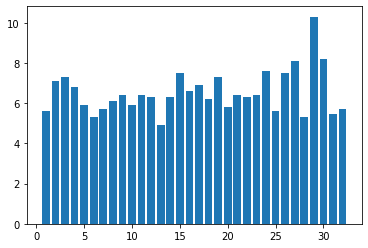

In [279]:
peaks = pd.DataFrame(bypeak, columns=['name', 'peak', 'mid', 'nearest_min', 'xmin', 'diff']).set_index('mid')
plt.bar(peaks.index, peaks.peak)

In [280]:
peaks.sort_values('diff', inplace=True)

In [281]:
peaks

name       peak         nearest_min  \
mid                                                                          
13                IMG_0434.jpg IMG_0435.jpg   4.900000 2020-10-08 19:45:00   
28                             IMG_0502.jpg   5.300000 2020-10-14 15:39:00   
1                              IMG_0387.jpg   5.600000 2020-10-03 15:38:00   
5                              IMG_0396.jpg   5.900000 2020-10-04 19:40:00   
32                IMG_0515.jpg IMG_0518.jpg   5.700000 2020-10-16 17:10:00   
6                              IMG_0401.jpg   5.300000 2020-10-05 11:11:00   
25                             IMG_0490.jpg   5.600000 2020-10-12 19:37:00   
31                             IMG_0514.jpg   5.485388 2020-10-16 15:13:00   
22                             IMG_0477.jpg   6.300000 2020-10-11 18:50:00   
7                 IMG_0404.jpg IMG_0406.jpg   5.700000 2020-10-05 17:56:00   
20                             IMG_0473.jpg   5.800000 2020-10-11 13:20:00   
10                             IMG_0427.jpg   5.900000 2020-10-08 06:44:00   
2                              IMG_0389.jpg   7.100000 2020-10-03 21:53:00   
8    IMG_0409.jpg IMG_0412.jpg IMG_0413.jpg   6.100000 2020-10-05 20:41:00   
14                             IMG_0441.jpg   6.294811 2020-10-09 14:32:00   
9                              IMG_0426.jpg   6.400000 2020-10-07 18:59:00   
11                IMG_0430.jpg IMG_0431.jpg   6.400000 2020-10-08 11:45:00   
21                             IMG_0476.jpg   6.400000 2020-10-11 15:58:00   
23                IMG_0486.jpg IMG_0487.jpg   6.400000 2020-10-12 11:06:00   
12                             IMG_0432.jpg   6.300000 2020-10-08 15:45:00   
16                             IMG_0451.jpg   6.600000 2020-10-10 13:03:00   
18                             IMG_0462.jpg   6.200000 2020-10-10 19:58:00   
27                             IMG_0501.jpg   8.100000 2020-10-14 11:09:00   
24                IMG_0488.jpg IMG_0489.jpg   7.600000 2020-10-12 15:10:00   
26                             IMG_0499.jpg   7.500000 2020-10-14 09:09:00   
17                             IMG_0460.jpg   6.900000 2020-10-10 15:03:00   
4                 IMG_0391.jpg IMG_0392.jpg   6.801650 2020-10-04 13:54:00   
3                              IMG_0390.jpg   7.300000 2020-10-04 08:39:00   
19                IMG_0468.jpg IMG_0469.jpg   7.300000 2020-10-11 08:04:00   
15                             IMG_0446.jpg   7.500000 2020-10-10 09:48:00   
30                             IMG_0513.jpg   8.200000 2020-10-16 11:13:00   
29                             IMG_0511.jpg  10.300000 2020-10-15 17:26:00   

                   xmin      diff  
mid                                
13  2020-10-08 20:00:34  0.000000  
28  2020-10-14 15:57:08  0.000000  
1   2020-10-03 15:50:36  0.000000  
5   2020-10-04 19:56:54  0.000000  
32  2020-10-16 19:42:26  0.062637  
6   2020-10-05 11:14:56  0.400000  
25  2020-10-12 19:43:28  0.500000  
31  2020-10-16 15:25:04  0.685388  
22  2020-10-11 19:01:02  0.800000  
7   2020-10-05 18:06:26  0.800000  
20  2020-10-11 13:34:14  1.200000  
10  2020-10-08 06:57:48  1.300000  
2   2020-10-03 22:05:18  1.400000  
8   2020-10-05 20:51:54  1.500000  
14  2020-10-09 14:45:28  1.521316  
9   2020-10-07 19:04:50  1.600000  
11  2020-10-08 11:52:06  1.600000  
21  2020-10-11 16:06:00  1.600000  
23  2020-10-12 11:14:34  1.600000  
12  2020-10-08 15:53:16  1.700000  
16  2020-10-10 13:15:06  1.800000  
18  2020-10-10 20:34:22  1.804578  
27  2020-10-14 11:20:16  2.000000  
24  2020-10-12 15:25:04  2.022984  
26  2020-10-14 09:26:40  2.100000  
17  2020-10-10 15:20:52  2.100000  
4   2020-10-04 14:04:58  2.101650  
3   2020-10-04 08:47:14  2.500000  
19  2020-10-11 08:17:54  2.700000  
15  2020-10-10 09:59:04  3.013464  
30  2020-10-16 11:23:46  3.100000  
29  2020-10-15 17:41:20  5.000000

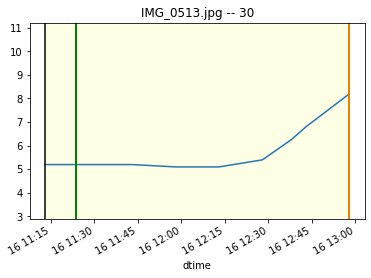

In [282]:
plot_resp_byname('IMG_0513.jpg')


In [283]:
GB = meals.groupby('cdate')
okdate=GB.meal_id.count() > 2
okdate=okdate[okdate]


In [284]:
okdate.index

Index([2020-10-04, 2020-10-05, 2020-10-08, 2020-10-10, 2020-10-11, 2020-10-12,
       2020-10-14, 2020-10-16],
      dtype='object', name='cdate')

In [285]:
peaks['cdate'] = peaks.xmin.dt.date
peaks['ok'] = peaks.cdate.map(lambda x: x in okdate.index)

In [286]:
okpeaks = peaks[peaks.ok]

In [287]:
okpeaks

name      peak         nearest_min  \
mid                                                                         
13                IMG_0434.jpg IMG_0435.jpg  4.900000 2020-10-08 19:45:00   
28                             IMG_0502.jpg  5.300000 2020-10-14 15:39:00   
5                              IMG_0396.jpg  5.900000 2020-10-04 19:40:00   
32                IMG_0515.jpg IMG_0518.jpg  5.700000 2020-10-16 17:10:00   
6                              IMG_0401.jpg  5.300000 2020-10-05 11:11:00   
25                             IMG_0490.jpg  5.600000 2020-10-12 19:37:00   
31                             IMG_0514.jpg  5.485388 2020-10-16 15:13:00   
22                             IMG_0477.jpg  6.300000 2020-10-11 18:50:00   
7                 IMG_0404.jpg IMG_0406.jpg  5.700000 2020-10-05 17:56:00   
20                             IMG_0473.jpg  5.800000 2020-10-11 13:20:00   
10                             IMG_0427.jpg  5.900000 2020-10-08 06:44:00   
8    IMG_0409.jpg IMG_0412.jpg IMG_0413.jpg  6.100000 2020-10-05 20:41:00   
11                IMG_0430.jpg IMG_0431.jpg  6.400000 2020-10-08 11:45:00   
21                             IMG_0476.jpg  6.400000 2020-10-11 15:58:00   
23                IMG_0486.jpg IMG_0487.jpg  6.400000 2020-10-12 11:06:00   
12                             IMG_0432.jpg  6.300000 2020-10-08 15:45:00   
16                             IMG_0451.jpg  6.600000 2020-10-10 13:03:00   
18                             IMG_0462.jpg  6.200000 2020-10-10 19:58:00   
27                             IMG_0501.jpg  8.100000 2020-10-14 11:09:00   
24                IMG_0488.jpg IMG_0489.jpg  7.600000 2020-10-12 15:10:00   
26                             IMG_0499.jpg  7.500000 2020-10-14 09:09:00   
17                             IMG_0460.jpg  6.900000 2020-10-10 15:03:00   
4                 IMG_0391.jpg IMG_0392.jpg  6.801650 2020-10-04 13:54:00   
3                              IMG_0390.jpg  7.300000 2020-10-04 08:39:00   
19                IMG_0468.jpg IMG_0469.jpg  7.300000 2020-10-11 08:04:00   
15                             IMG_0446.jpg  7.500000 2020-10-10 09:48:00   
30                             IMG_0513.jpg  8.200000 2020-10-16 11:13:00   

                   xmin      diff       cdate    ok  
mid                                                  
13  2020-10-08 20:00:34  0.000000  2020-10-08  True  
28  2020-10-14 15:57:08  0.000000  2020-10-14  True  
5   2020-10-04 19:56:54  0.000000  2020-10-04  True  
32  2020-10-16 19:42:26  0.062637  2020-10-16  True  
6   2020-10-05 11:14:56  0.400000  2020-10-05  True  
25  2020-10-12 19:43:28  0.500000  2020-10-12  True  
31  2020-10-16 15:25:04  0.685388  2020-10-16  True  
22  2020-10-11 19:01:02  0.800000  2020-10-11  True  
7   2020-10-05 18:06:26  0.800000  2020-10-05  True  
20  2020-10-11 13:34:14  1.200000  2020-10-11  True  
10  2020-10-08 06:57:48  1.300000  2020-10-08  True  
8   2020-10-05 20:51:54  1.500000  2020-10-05  True  
11  2020-10-08 11:52:06  1.600000  2020-10-08  True  
21  2020-10-11 16:06:00  1.600000  2020-10-11  True  
23  2020-10-12 11:14:34  1.600000  2020-10-12  True  
12  2020-10-08 15:53:16  1.700000  2020-10-08  True  
16  2020-10-10 13:15:06  1.800000  2020-10-10  True  
18  2020-10-10 20:34:22  1.804578  2020-10-10  True  
27  2020-10-14 11:20:16  2.000000  2020-10-14  True  
24  2020-10-12 15:25:04  2.022984  2020-10-12  True  
26  2020-10-14 09:26:40  2.100000  2020-10-14  True  
17  2020-10-10 15:20:52  2.100000  2020-10-10  True  
4   2020-10-04 14:04:58  2.101650  2020-10-04  True  
3   2020-10-04 08:47:14  2.500000  2020-10-04  True  
19  2020-10-11 08:17:54  2.700000  2020-10-11  True  
15  2020-10-10 09:59:04  3.013464  2020-10-10  True  
30  2020-10-16 11:23:46  3.100000  2020-10-16  True

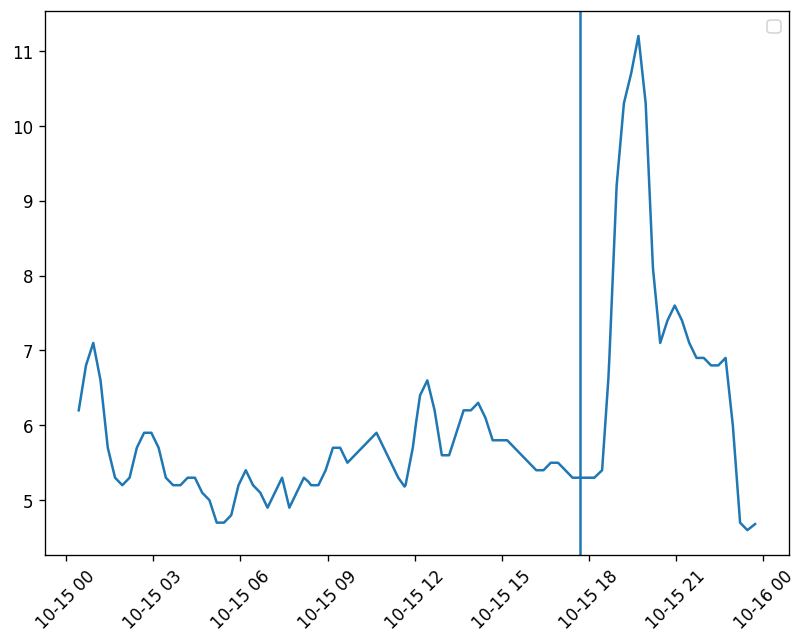

In [197]:
dag='2020-10-15'
gl.start_plot()
plt.plot(df.loc[dag][gl.G_LBL])
#plt.axvline(peaks.loc[29].xmin)
plt.axvline(peaks.loc[28].xmin)
gl.end_plot()

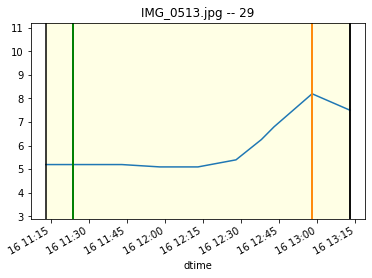

In [190]:
plot_response_to_meal(29)

In [297]:
def plot_resp_byname(mnam):
    i = meals_byname.loc[mnam].meal_id
    plot_response_to_meal(i)
    
def plot_response_to_meal(i):
    m_min, m_max, min_lim, max_lim, name, all_x, m_all = get_meal_bounds(i)
    nmin=nearest(df, min_lim)
    nmax=nearest(df, max_lim)
    meal_gl = df.loc[nmin:nmax][gl.G_LBL]

    meal_gl.plot()
    #df.loc[nmin:nmax].dg_dt.plot()
    plt.axvline(nmin, color='black')
    plt.axvline(nmax, color='black')
    plt.axvline(nmax, color='black')
    #plt.fill_between([nmin, nmax], [meal_gl.max(), meal_gl.max()], [meal_gl.min(), meal_gl.min()], alpha=0.2)
    plt.axvspan(nmin, nmax, color='yellow', alpha=0.1)
    plt.axvline(m_min, color='green')
    plt.axvline(m_max, color='green')
    for x in all_x:
        plt.axvline(x, color='green')
    plt.axvspan(m_min, m_max, color='blue', alpha=0.2)

    derivmax_i = df.loc[m_min:nmax]['dg_dt'].idxmax()

    plt.axvline(derivmax_i, color='red')

    peak_i = df.loc[m_min:nmax][gl.G_LBL].idxmax()
    plt.axvline(peak_i, color='orange')
    #plt.ylim(df[gl.G_LBL].min(), df[gl.G_LBL].max())
    plt.title('{} -- {}'.format(name, i))
    plt.show()

In [178]:
meals_byname.columns

Index(['day', 'hour', 'minute', 'time_fmt', 'time_str', 'ctime', 'cdate', 'dt',
       'session_start', 'meal_id', 'file'],
      dtype='object')

In [142]:
peaks.iloc[-5:]

name  peak         nearest_min                xmin
mid                                                                         
24   IMG_0488.jpg IMG_0489.jpg   7.6 2020-10-12 15:10:00 2020-10-12 15:25:04
27                IMG_0501.jpg   8.1 2020-10-14 11:09:00 2020-10-14 11:20:16
26                IMG_0499.jpg   8.2 2020-10-14 09:09:00 2020-10-14 09:26:40
30                IMG_0513.jpg   8.2 2020-10-16 11:13:00 2020-10-16 11:23:46
29                IMG_0511.jpg  10.3 2020-10-15 17:26:00 2020-10-15 17:41:20

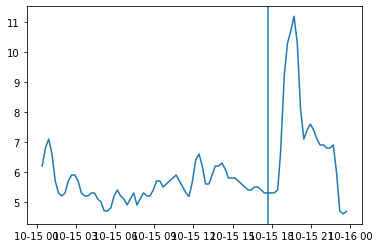

In [146]:
dag='2020-10-15'

plt.plot(df.loc[dag][gl.G_LBL])
plt.axvline(peaks.loc[29].xmin)
#plt.axvline(peaks.loc[29].xmin)
#plt.axvline(peaks.loc[28].xmin)
#plt.axvline(peaks.loc[13].xmin)

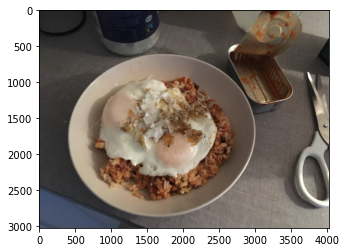

In [232]:
show_image('IMG_0391.jpg')

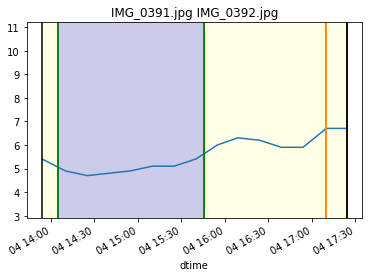

In [61]:
plt.stream_plot(meal_gl.index, meal_gl)

AttributeError: module 'matplotlib.pyplot' has no attribute 'stream_plot'